In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('credit_card_customer_data.csv')

In [4]:
df.head()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3

In [5]:
df.tail()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
655    656         51108             99000                  10   
656    657         60732             84000                  10   
657    658         53834            145000                   8   
658    659         80655            172000                  10   
659    660         80150            167000                   9   

     Total_visits_bank  Total_visits_online  Total_calls_made  
655                  1                   10                 0  
656                  1                   13                 2  
657                  1                    9                 1  
658                  1                   15                 0  
659                  0                   12                 2

In [6]:
df.shape

(660, 7)

In [7]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [11]:
df.describe()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
count  660.000000    660.000000        660.000000          660.000000   
mean   330.500000  55141.443939      34574.242424            4.706061   
std    190.669872  25627.772200      37625.487804            2.167835   
min      1.000000  11265.000000       3000.000000            1.000000   
25%    165.750000  33825.250000      10000.000000            3.000000   
50%    330.500000  53874.500000      18000.000000            5.000000   
75%    495.250000  77202.500000      48000.000000            6.000000   
max    660.000000  99843.000000     200000.000000           10.000000   

       Total_visits_bank  Total_visits_online  Total_calls_made  
count         660.000000           660.000000        660.000000  
mean            2.403030             2.606061          3.583333  
std             1.631813             2.935724          2.865317  
min             0.000000             0.000000          0.000000  
25%             1.000000             1.000000          1.000000  
50%             2.000000             2.000000          3.000000  
75%             4.000000             4.000000          5.000000  
max             5.000000            15.000000         10.000000

In [12]:
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [13]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index([], dtype='object')

Numerical type columns:
Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')


In [14]:
df = df.drop('Sl_No', axis = 1)

In [15]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [16]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [17]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: []
Non-Categorical Features: []
Discrete Features: ['Total_visits_bank']
Continuous Features: ['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_online', 'Total_calls_made']


In [19]:
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

Total_visits_bank
[1 0 2 5 3 4]



In [20]:
for i in discrete:
    print(df[i].value_counts())
    print()

Total_visits_bank
2    158
1    112
0    100
3    100
5     98
4     92
Name: count, dtype: int64



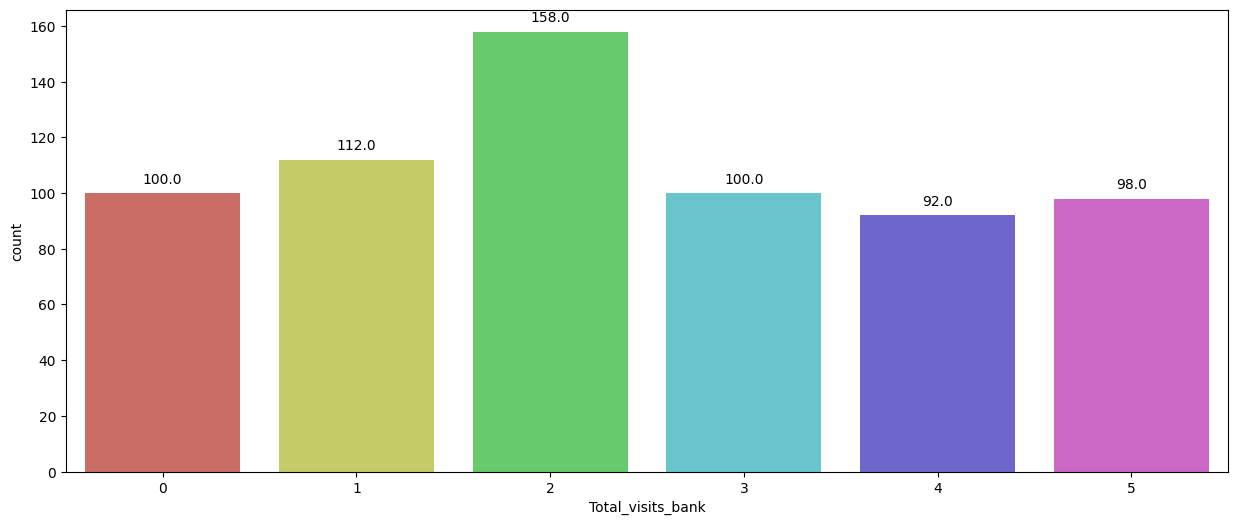

In [21]:
for i in discrete:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

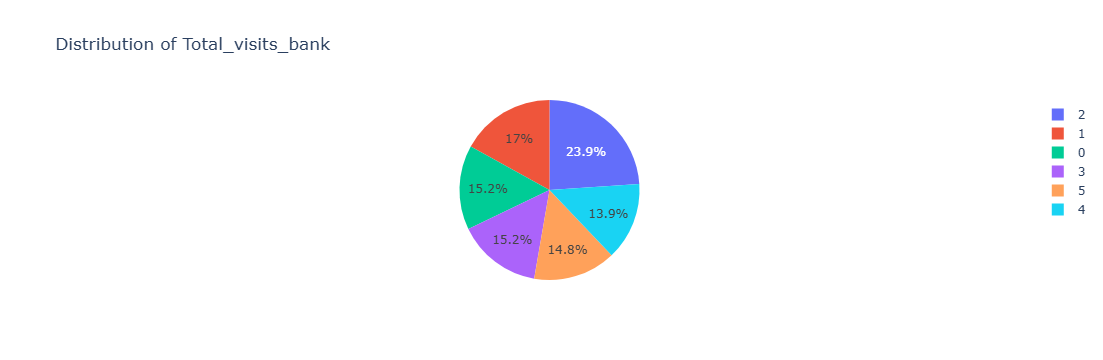

In [22]:
import plotly.express as px

for i in discrete:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

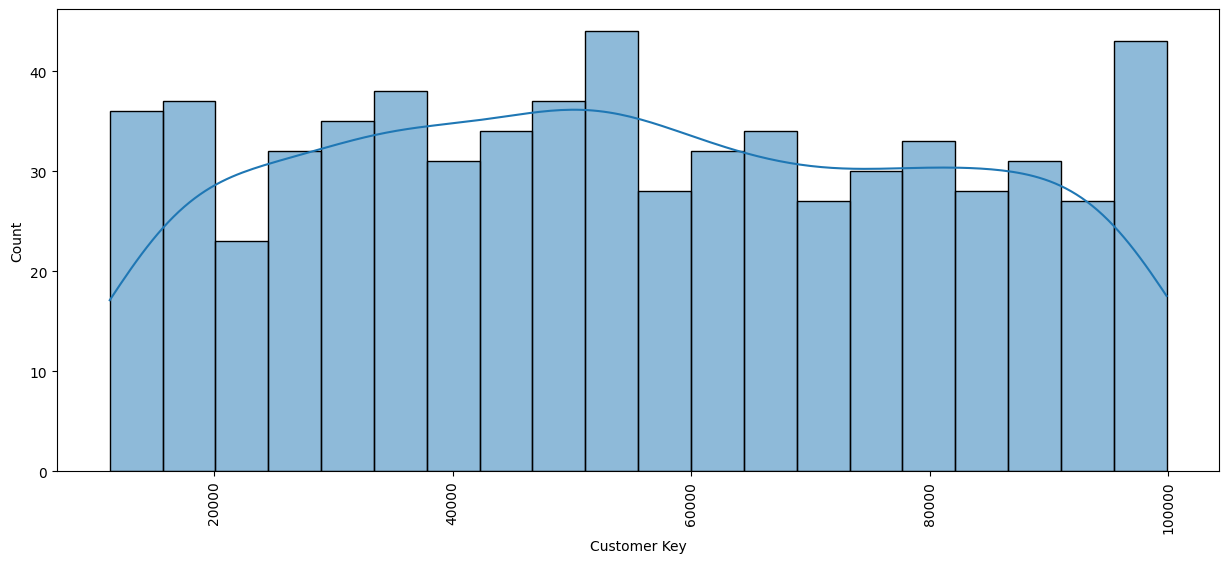

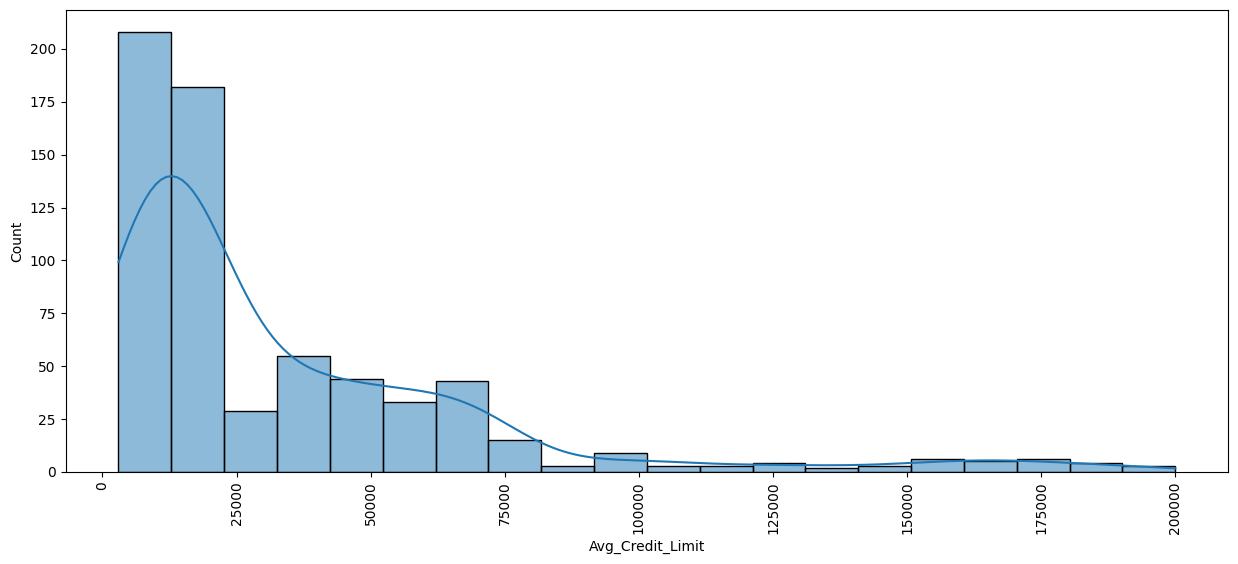

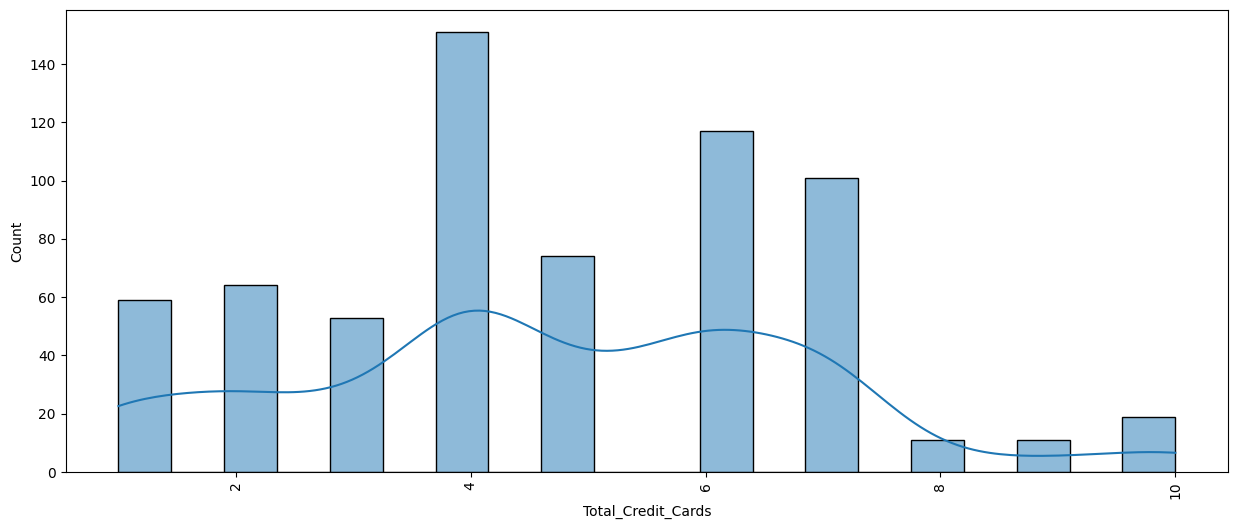

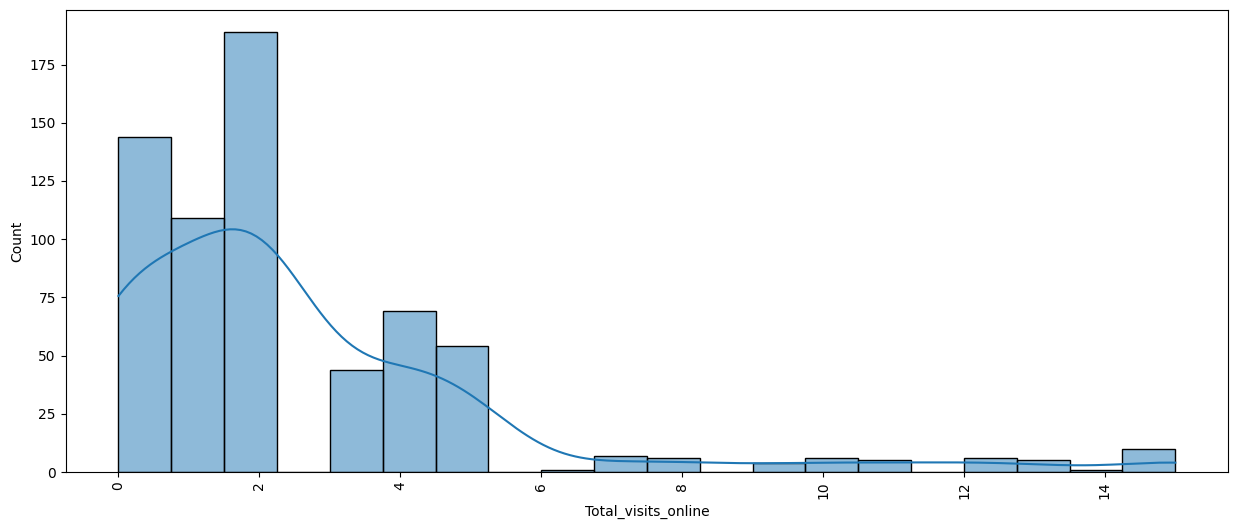

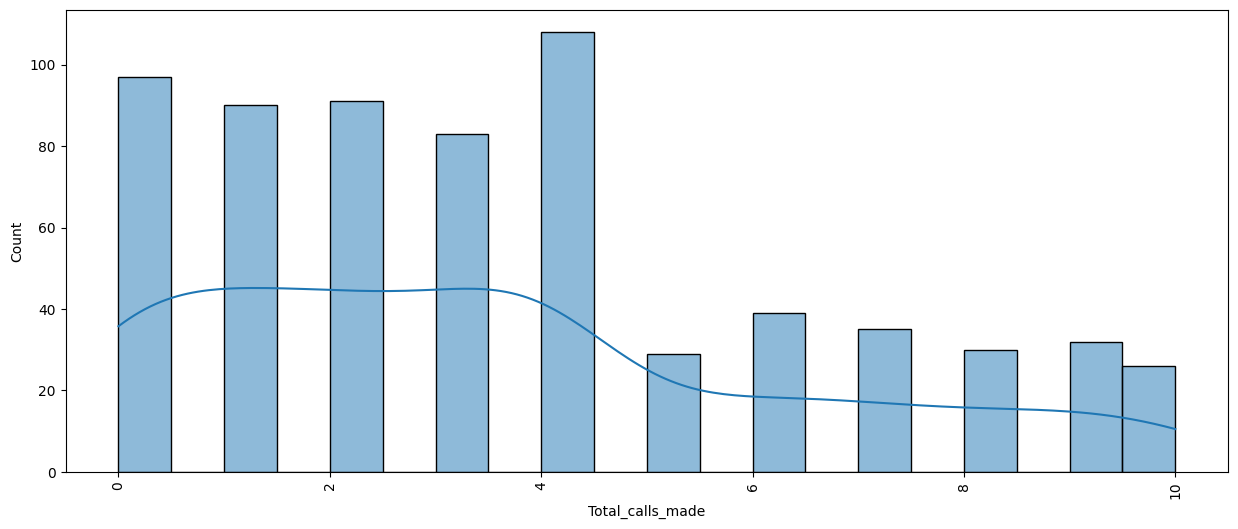

In [23]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

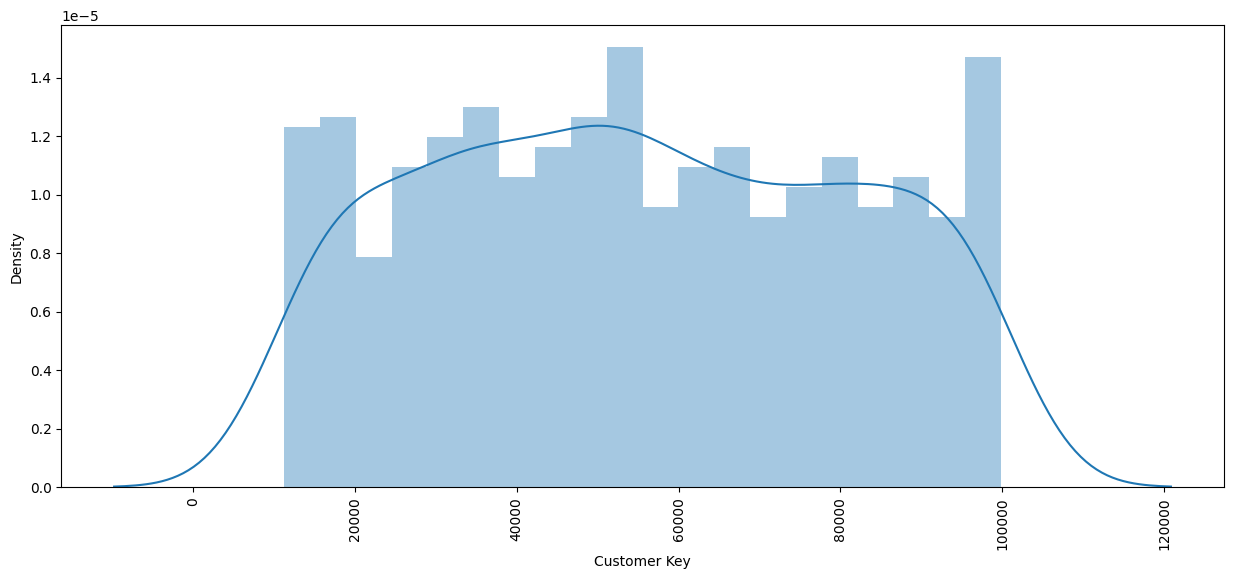

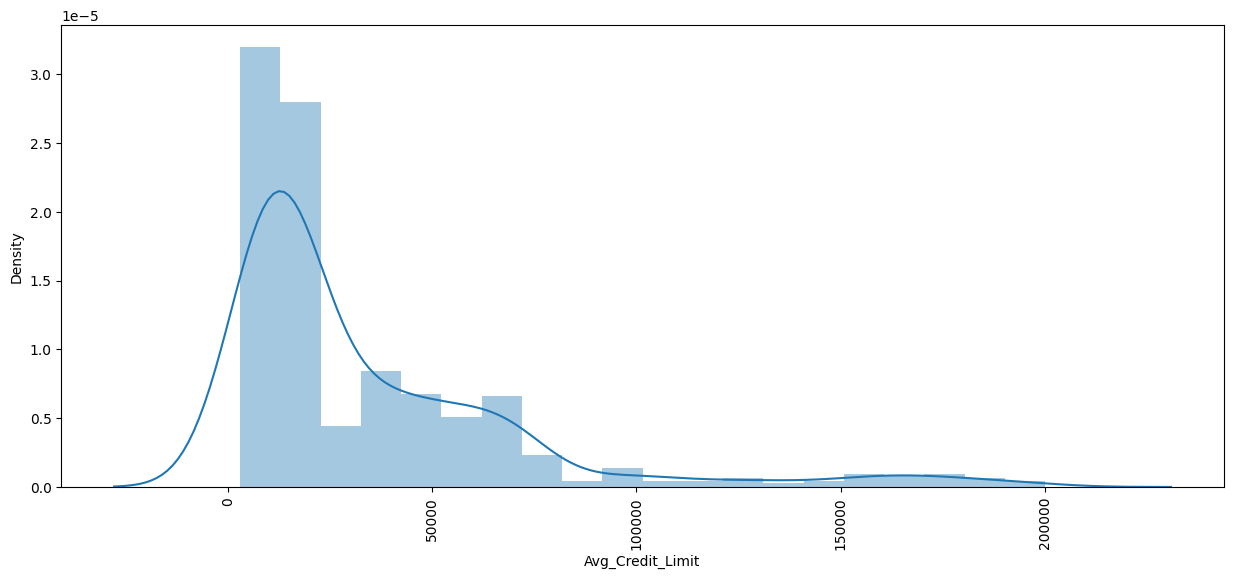

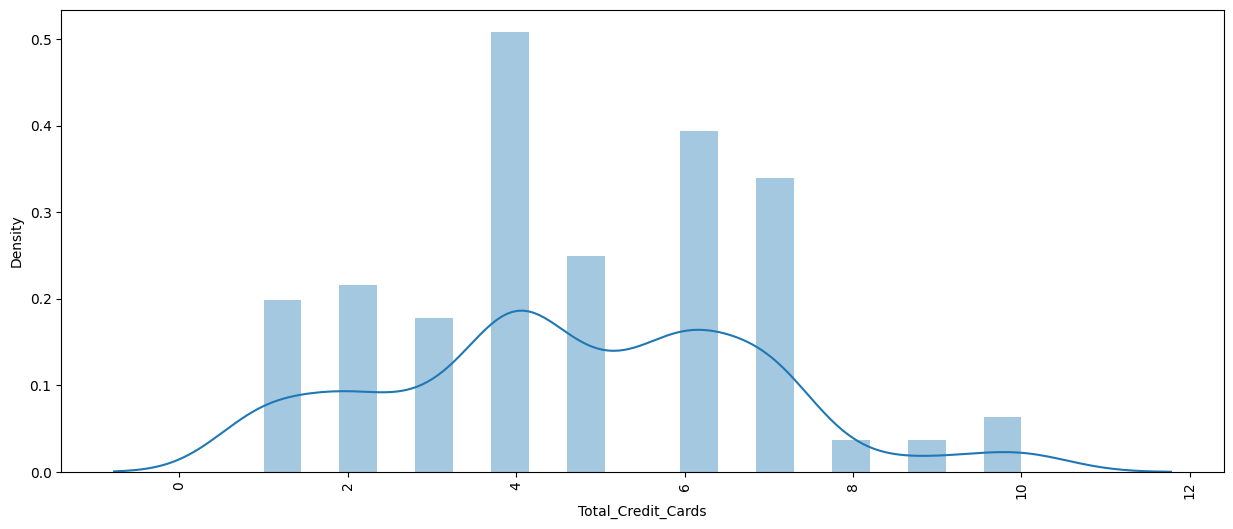

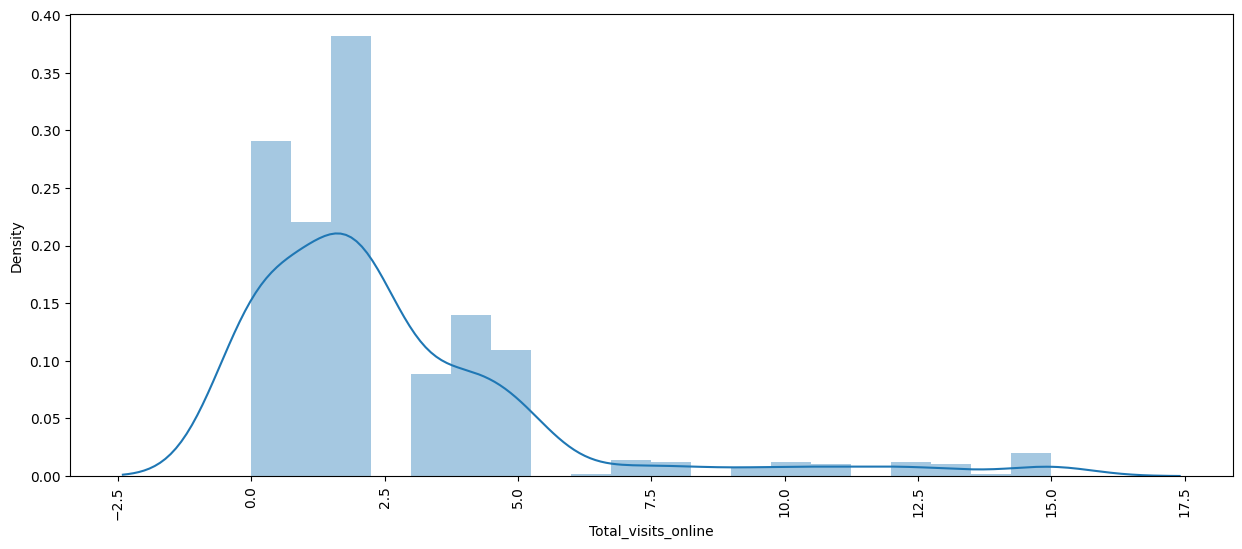

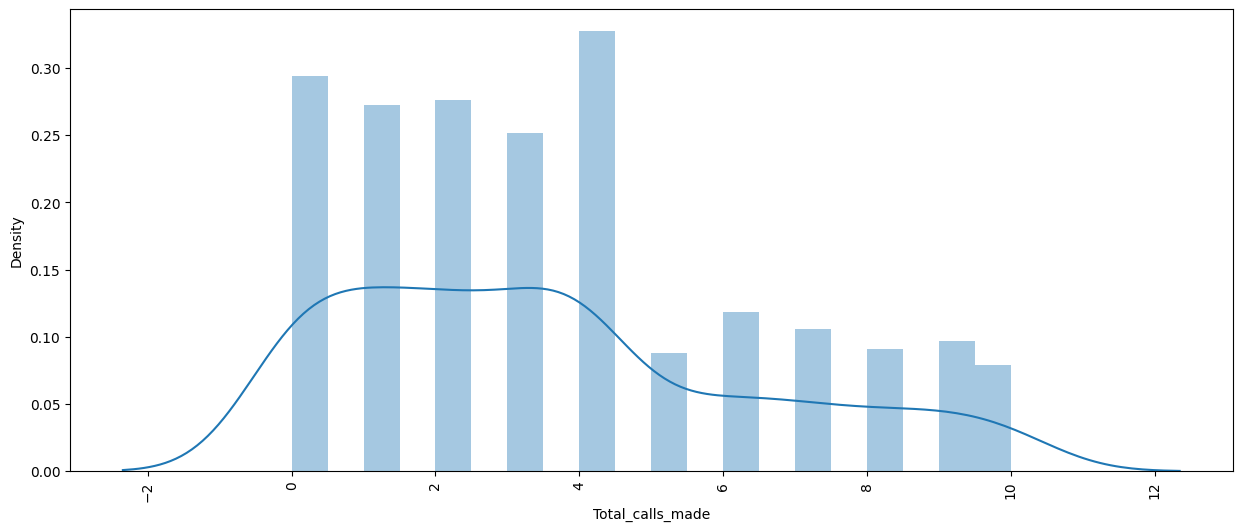

In [24]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

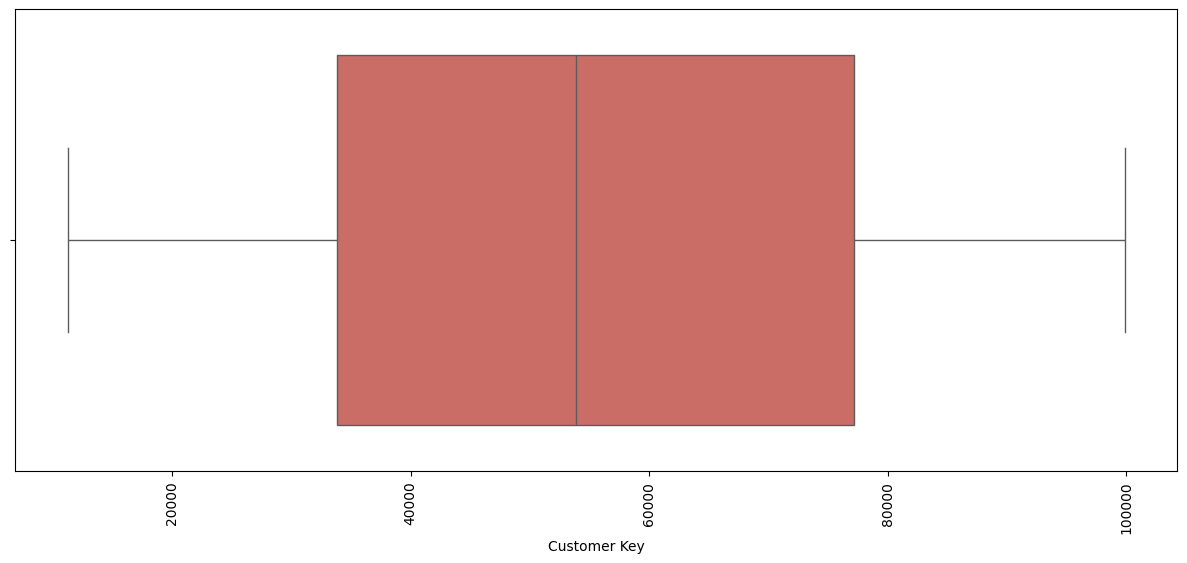

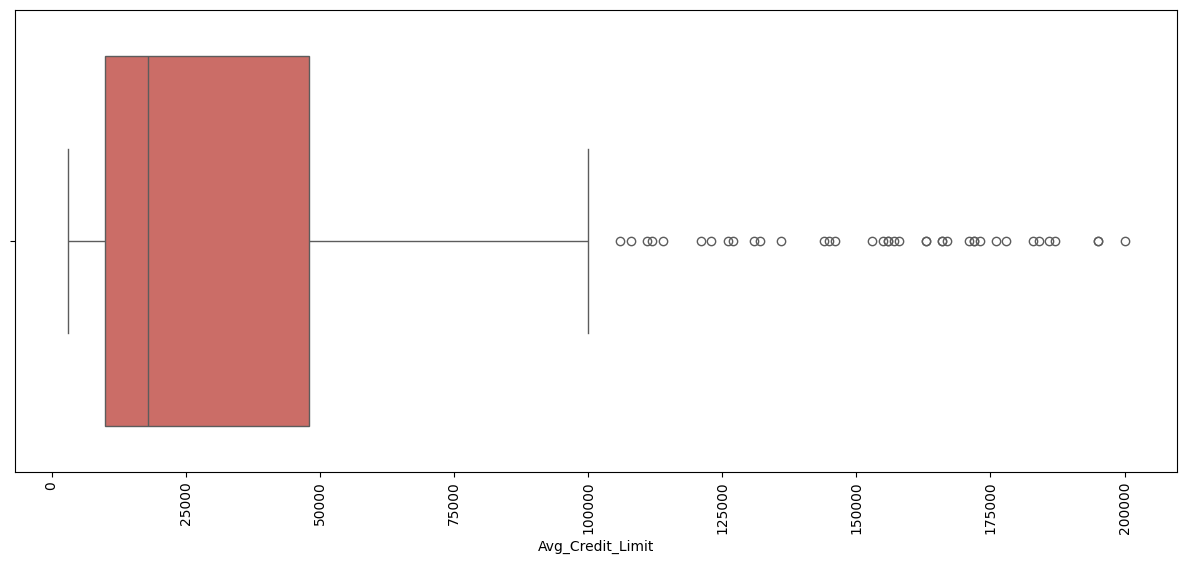

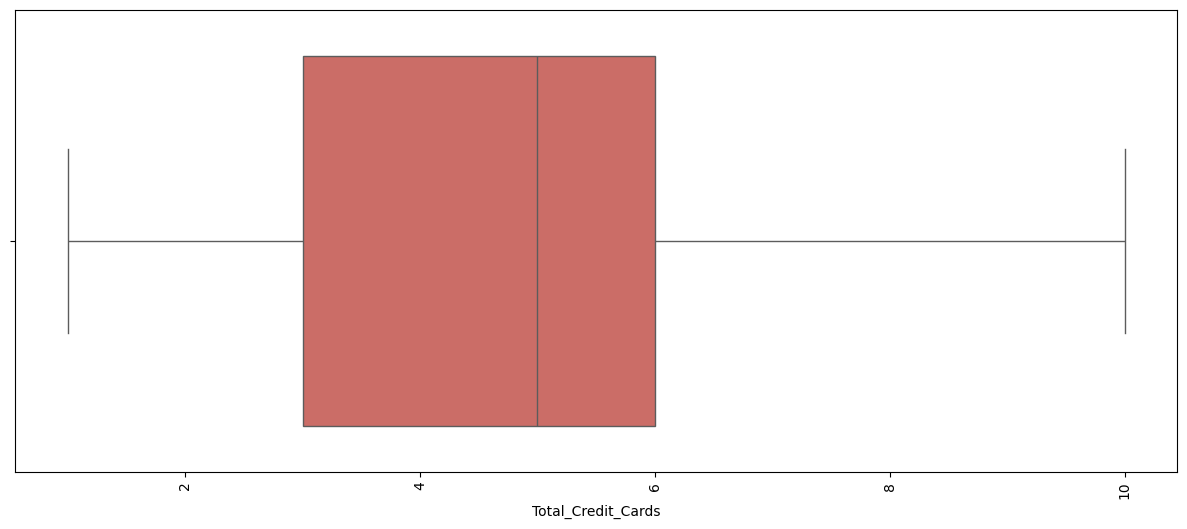

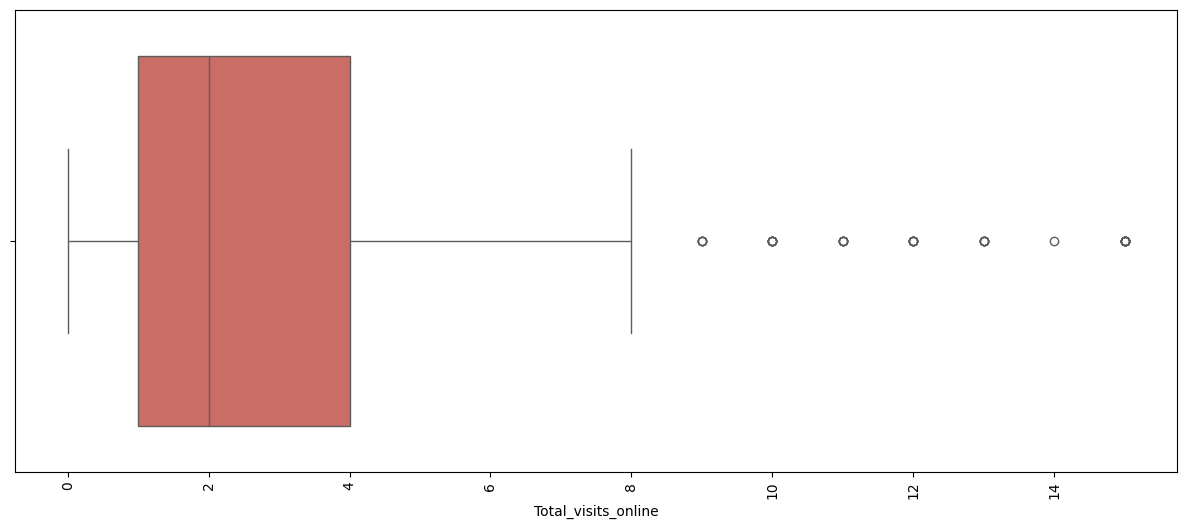

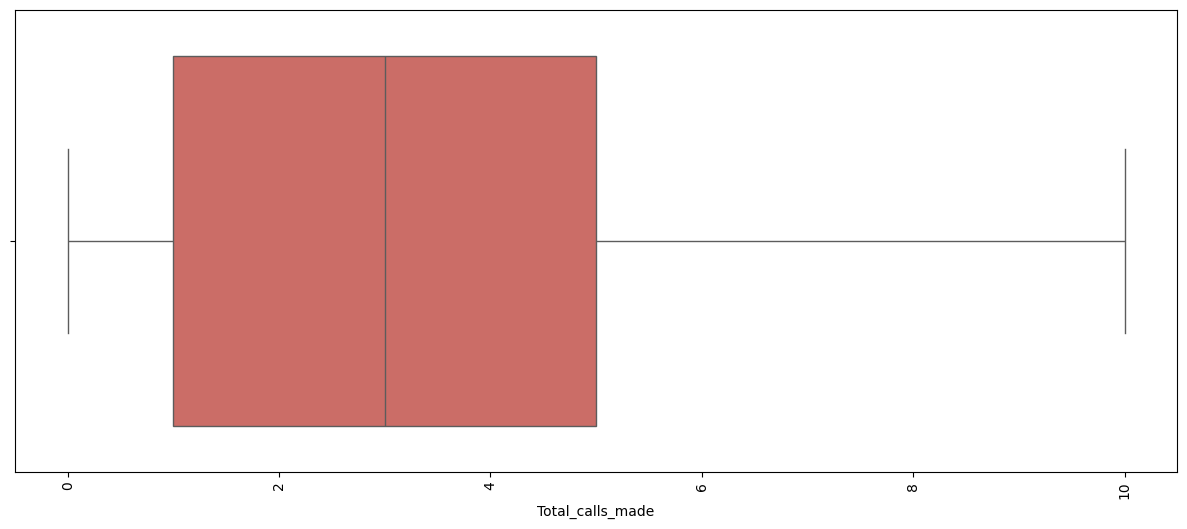

In [25]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

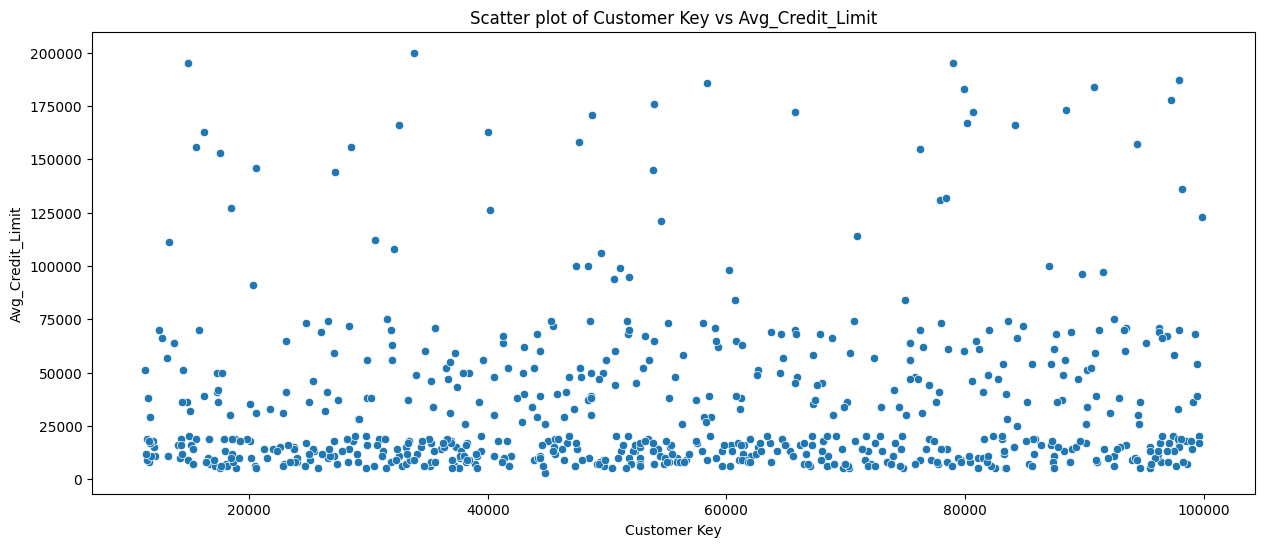

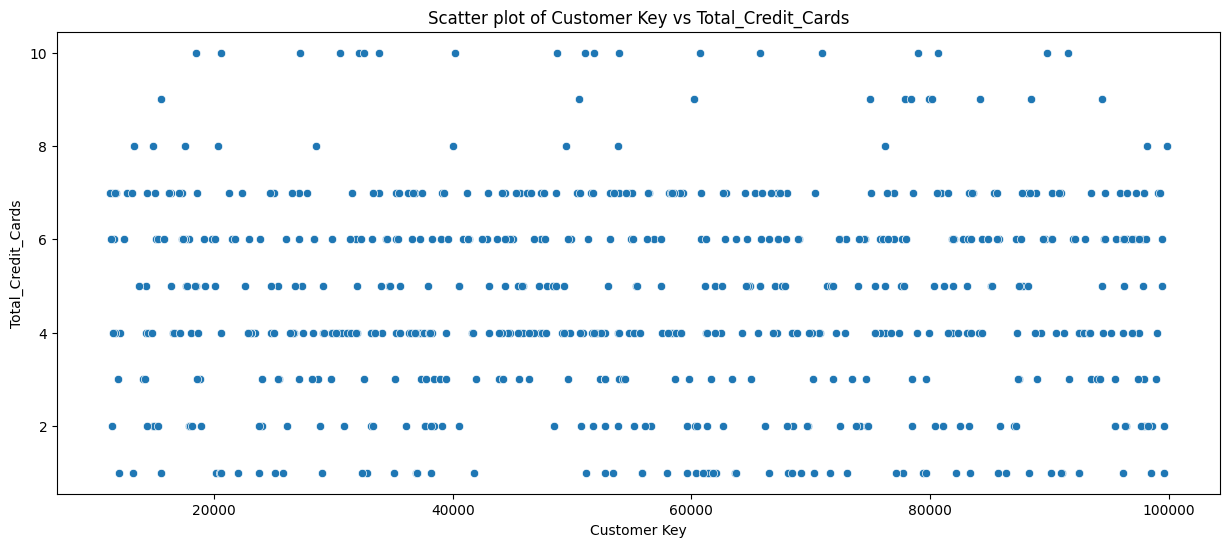

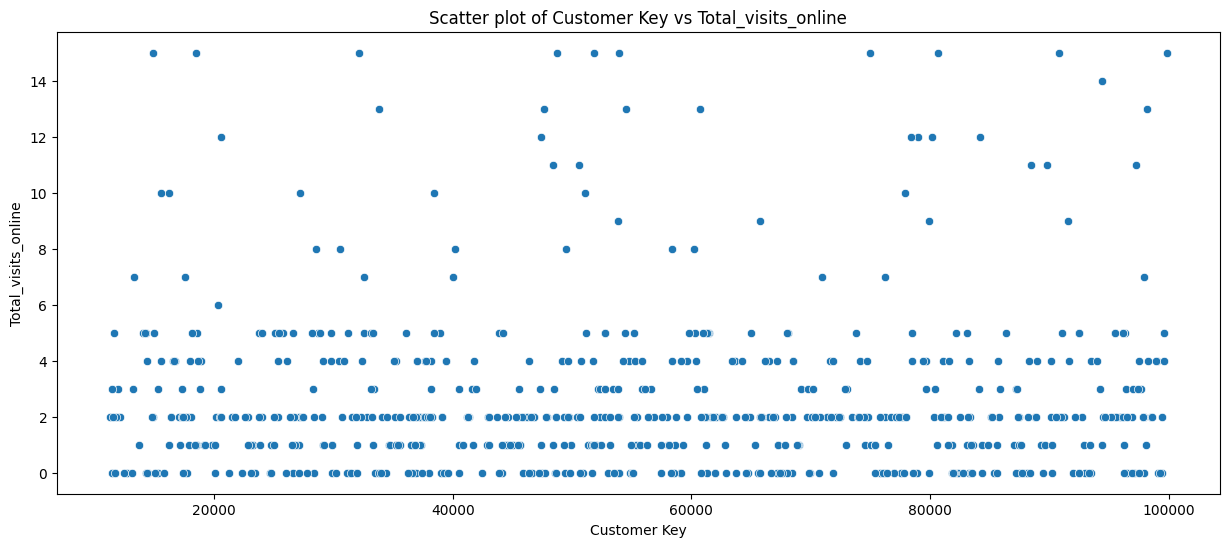

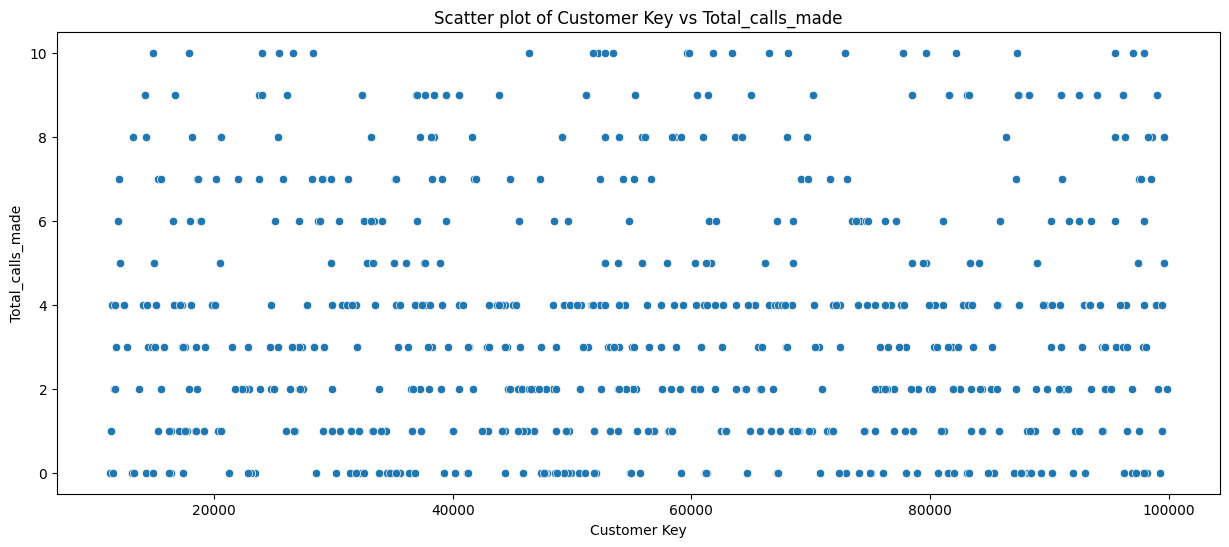

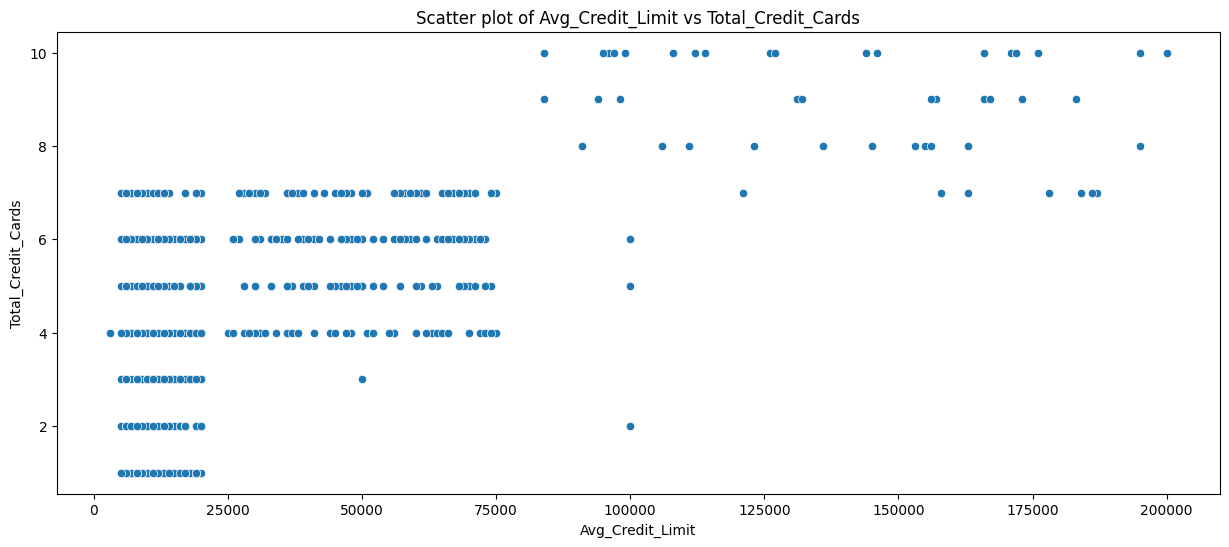

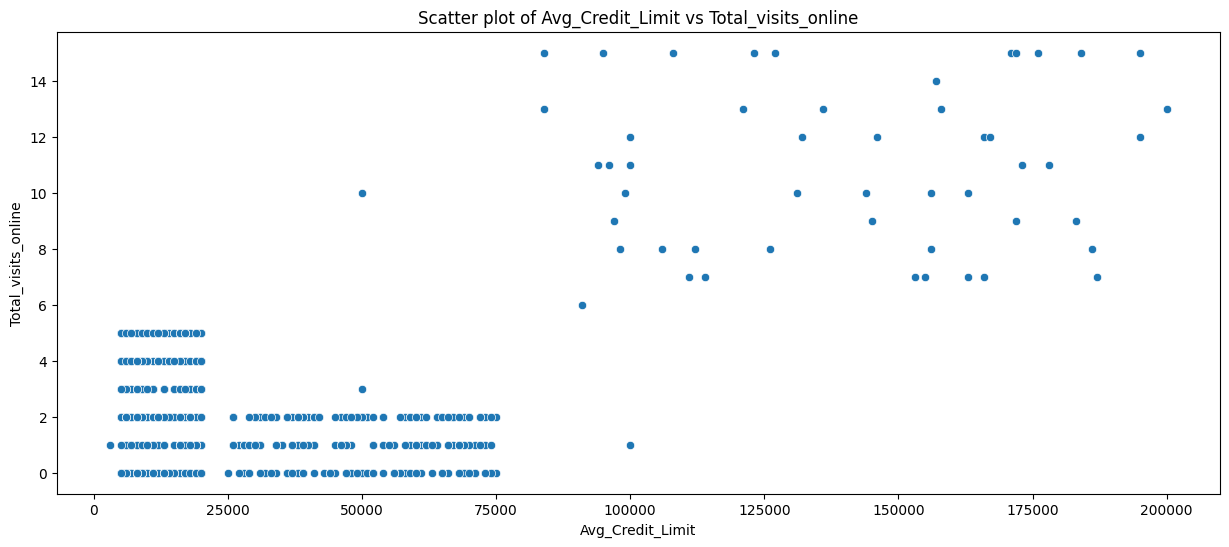

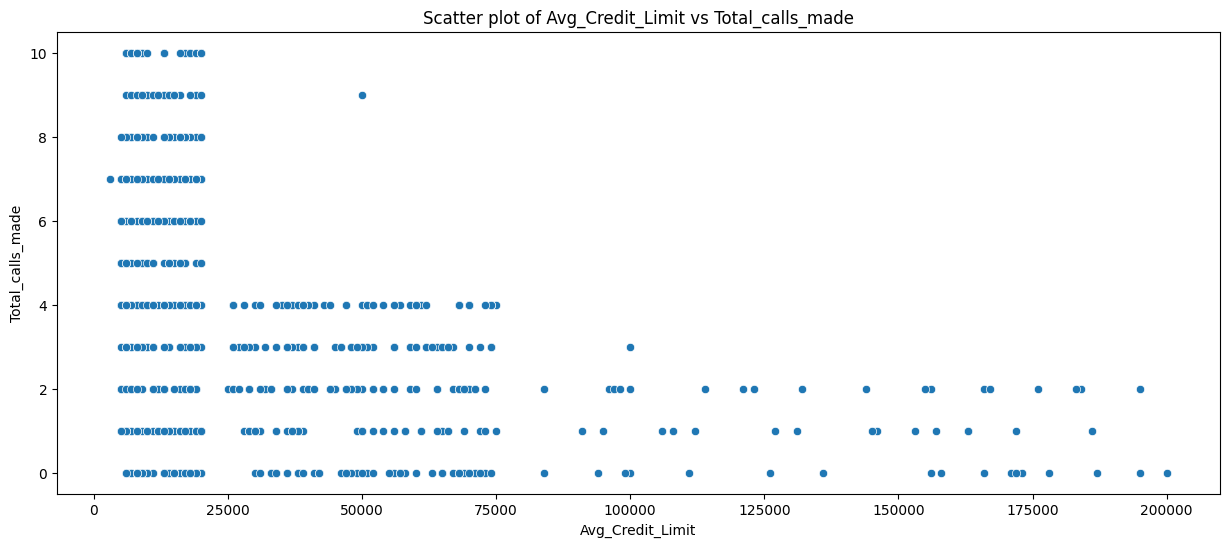

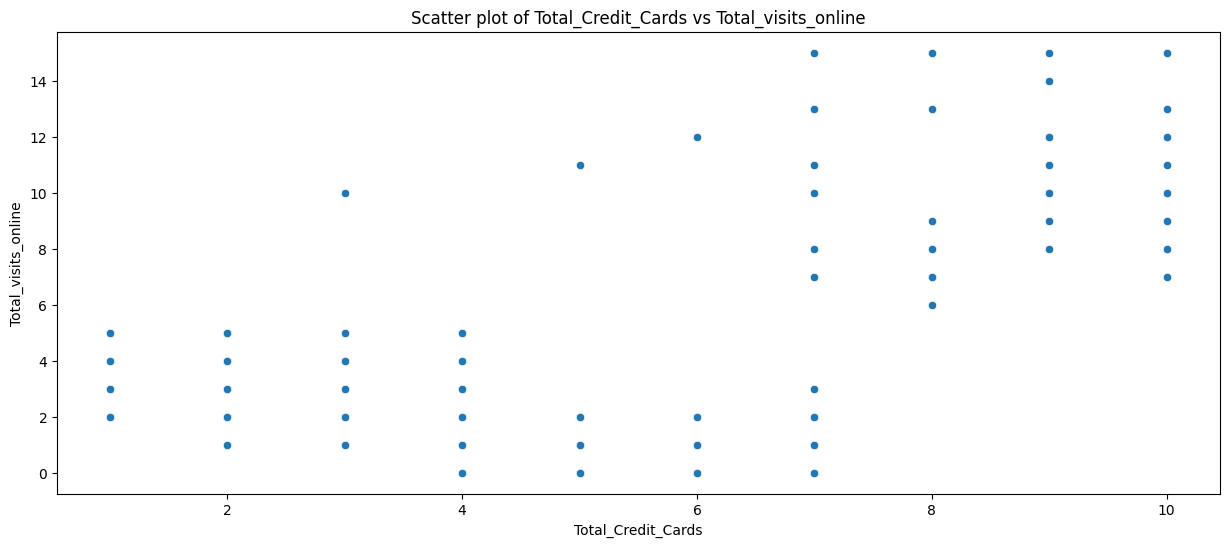

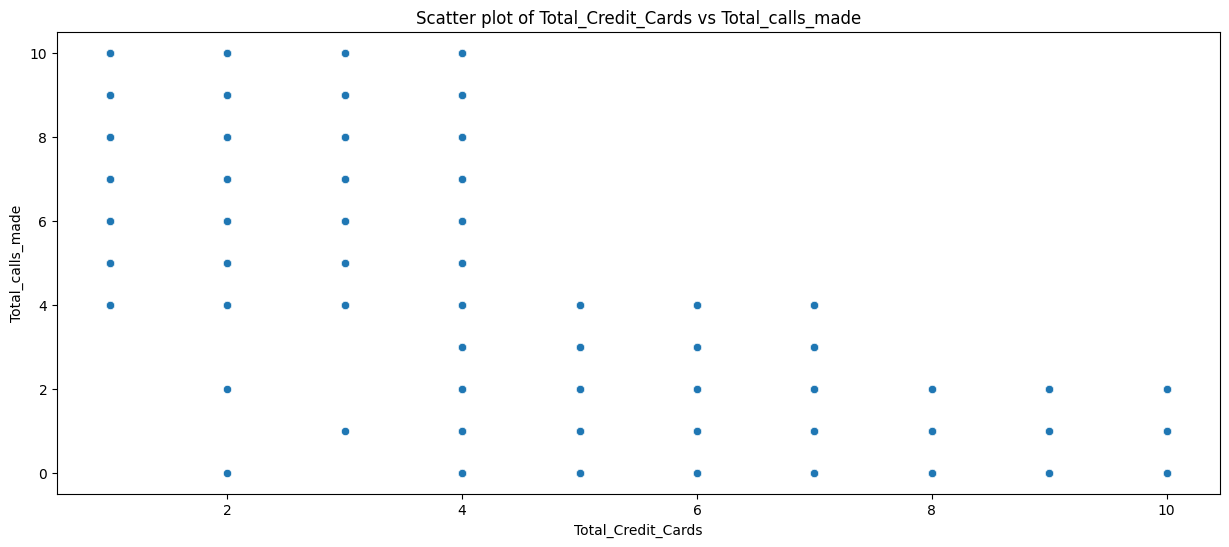

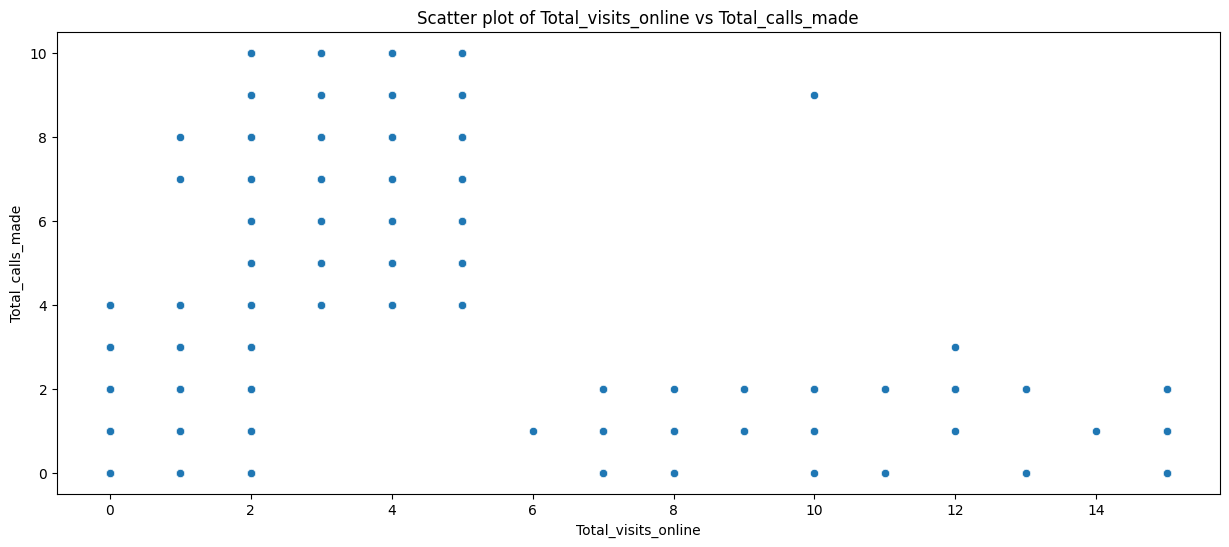

In [27]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.scatterplot(x=continuous[i], y=continuous[j], data=df, palette='hls')
        plt.title(f'Scatter plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

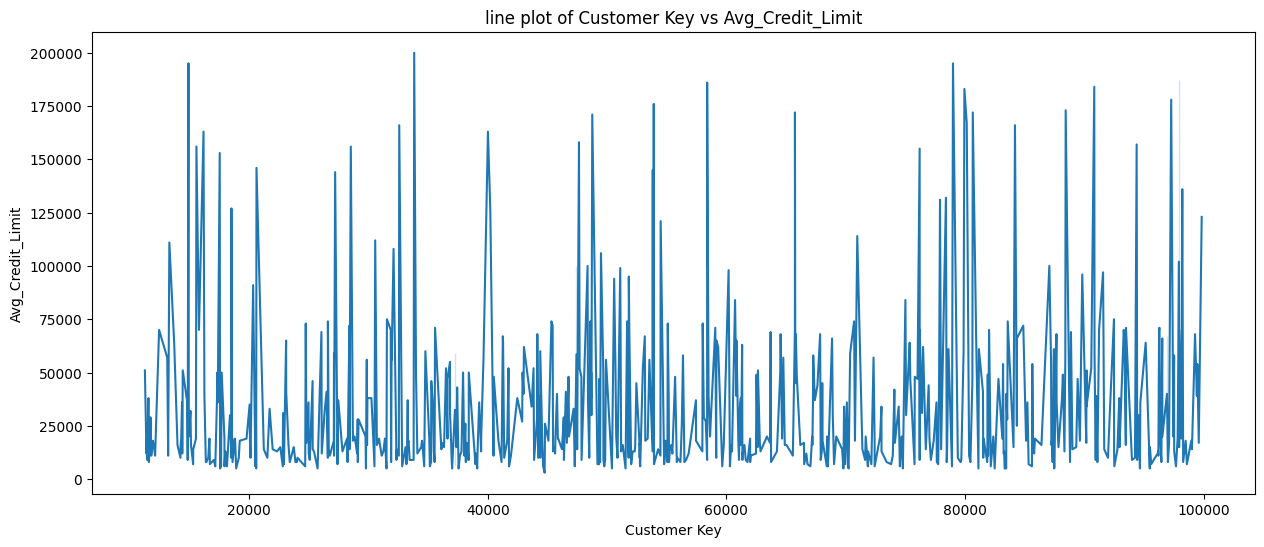

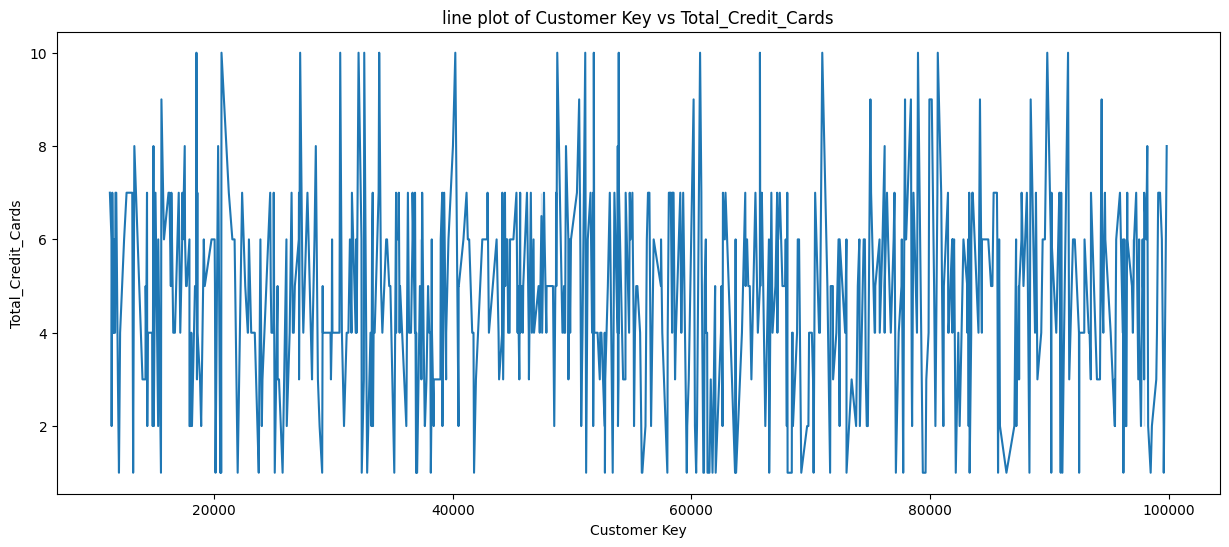

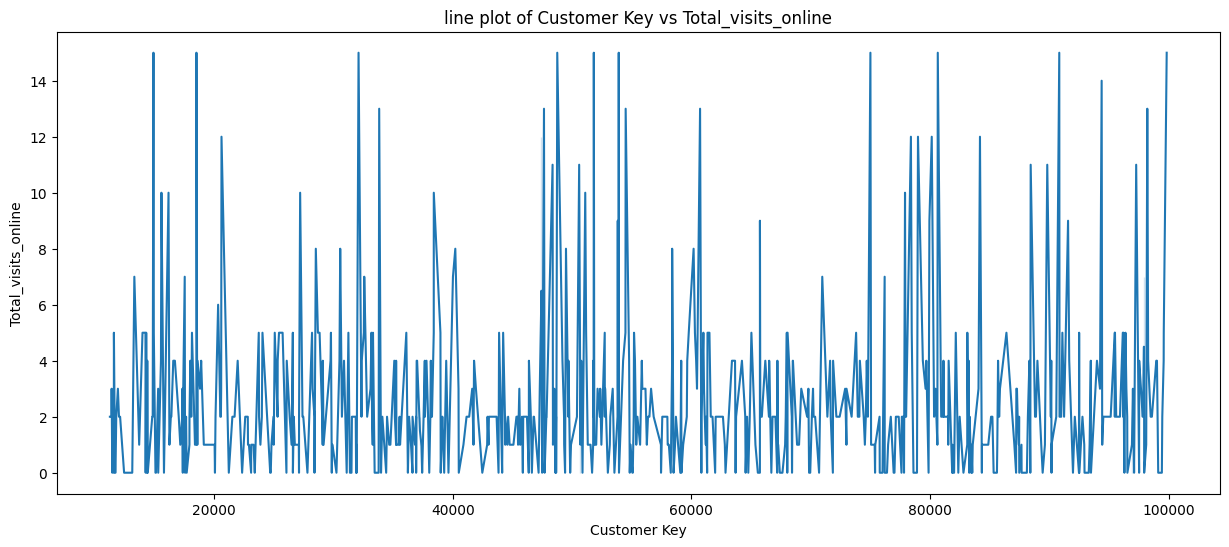

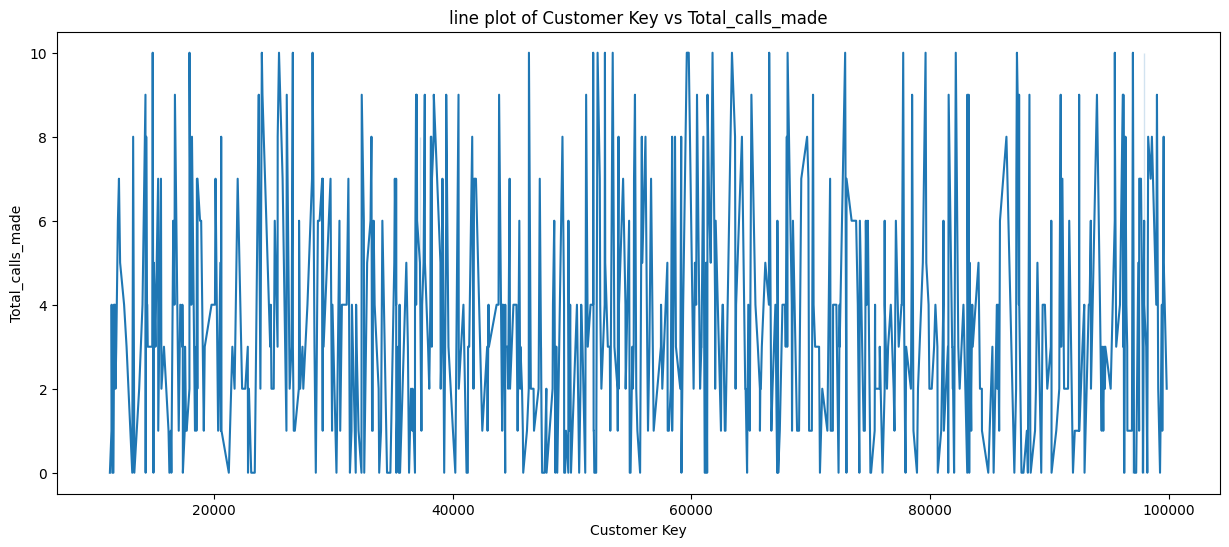

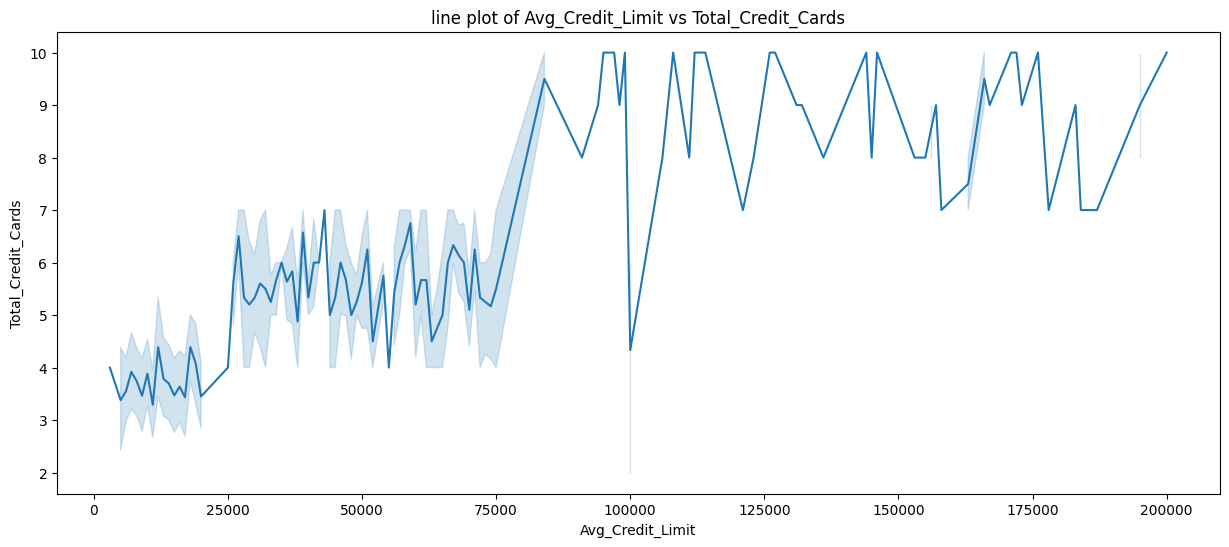

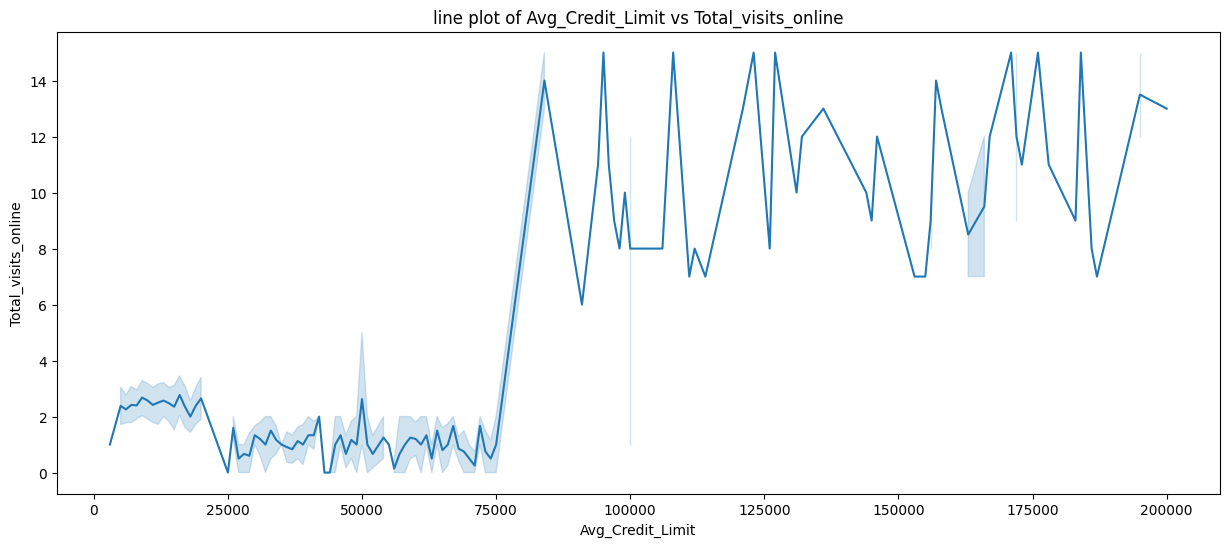

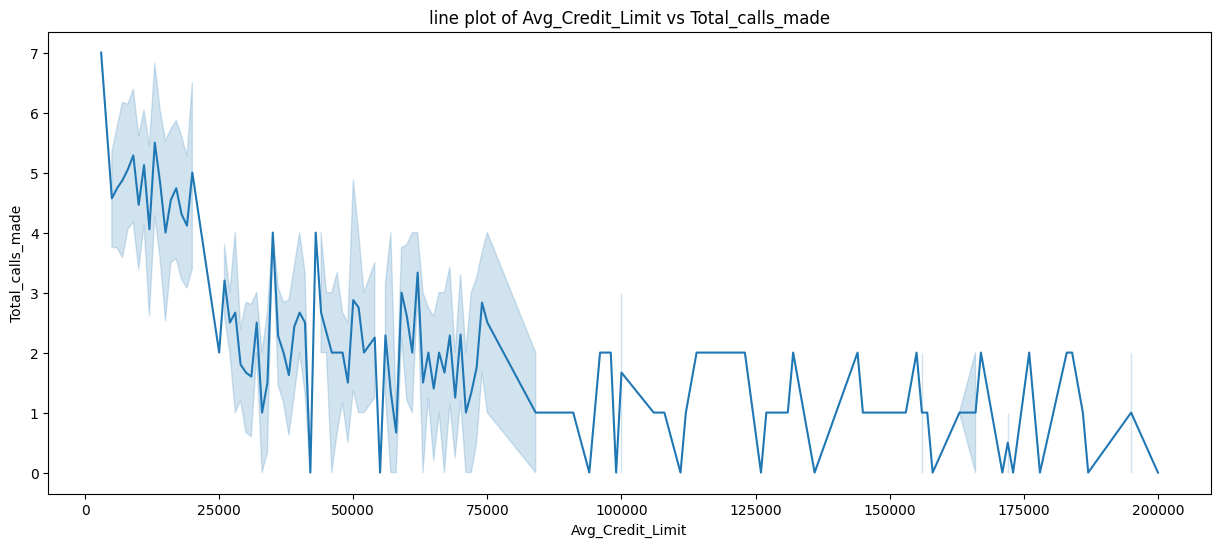

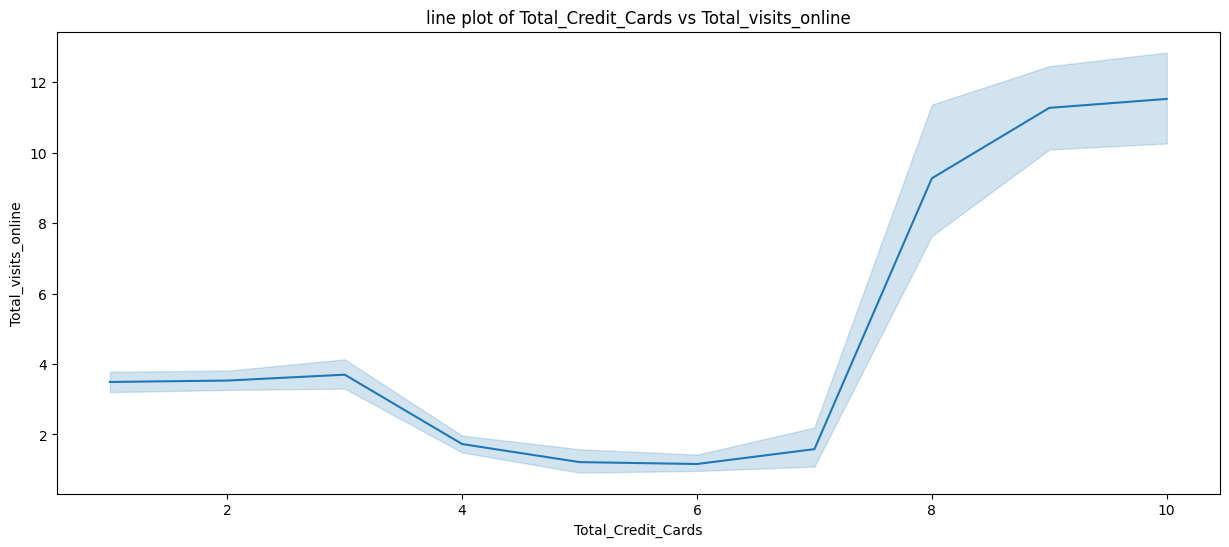

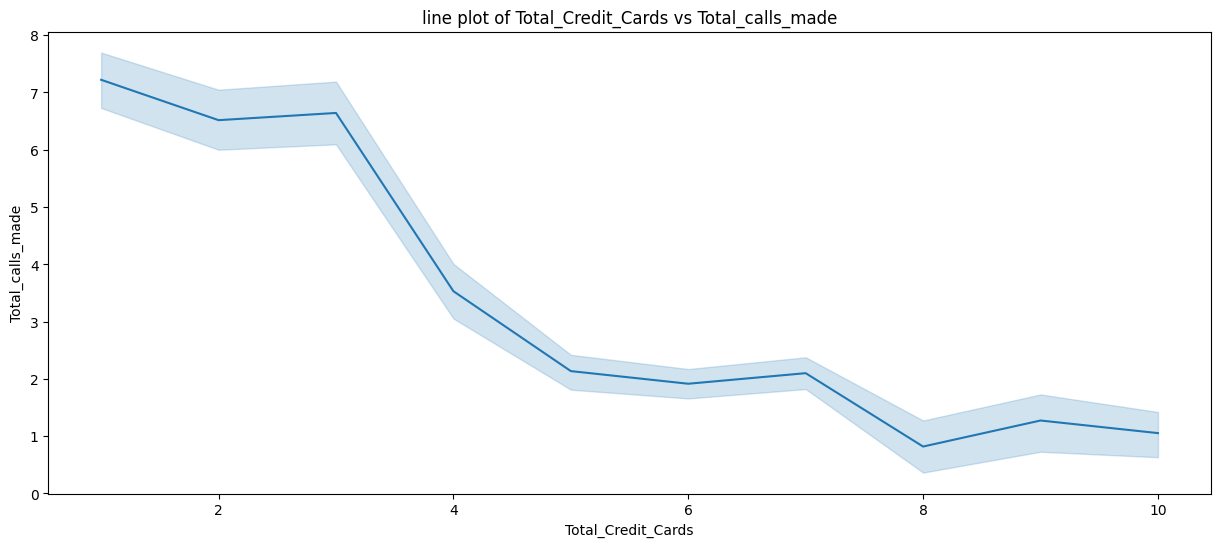

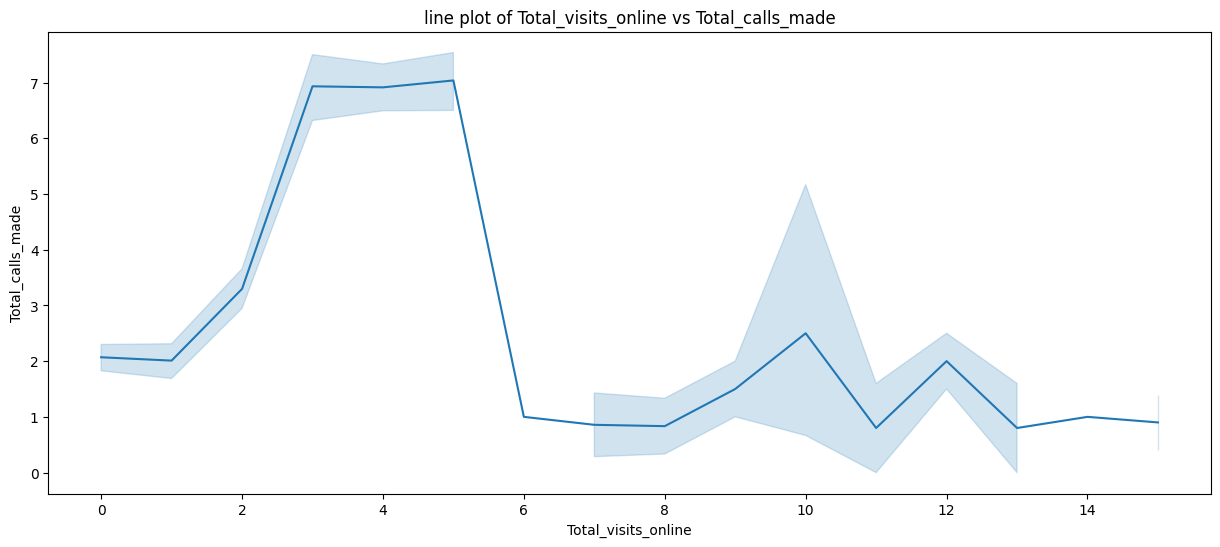

In [28]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.lineplot(x=continuous[i], y=continuous[j], data=df, palette='hls')
        plt.title(f'line plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

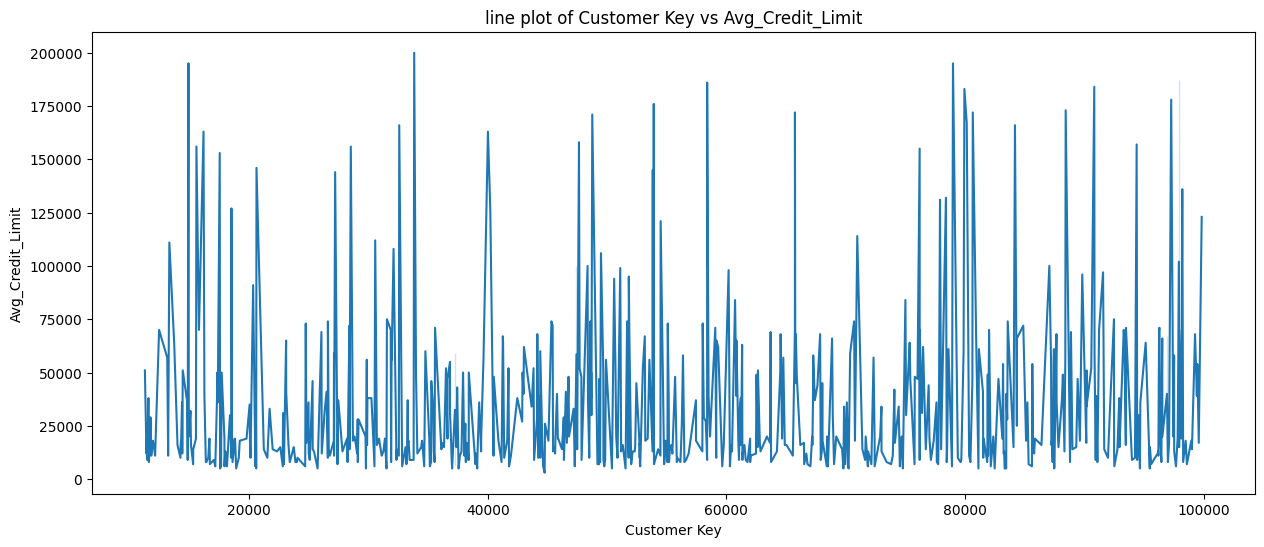

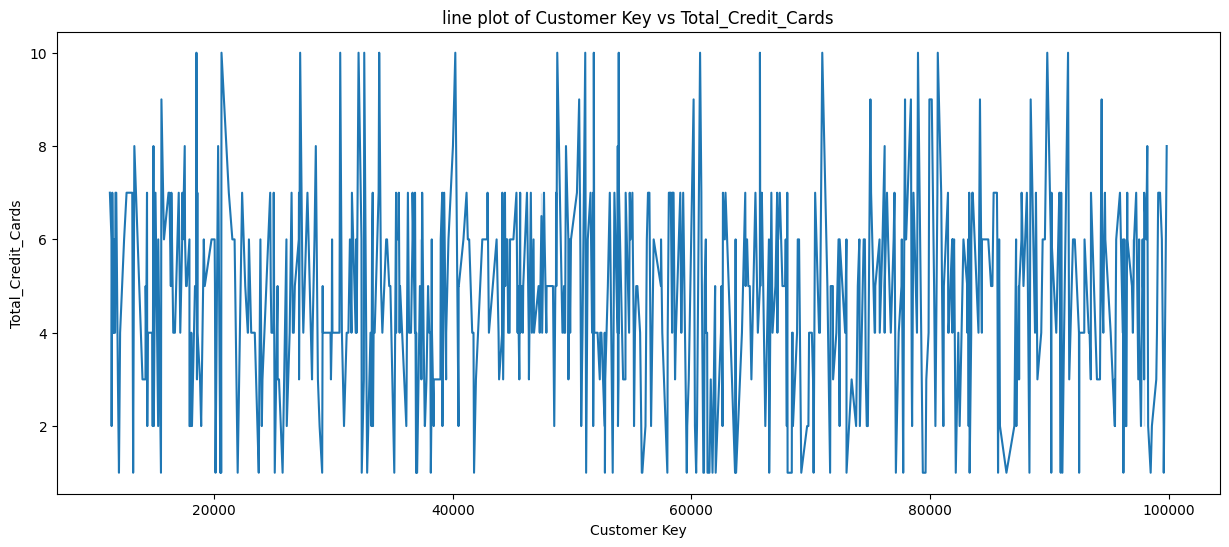

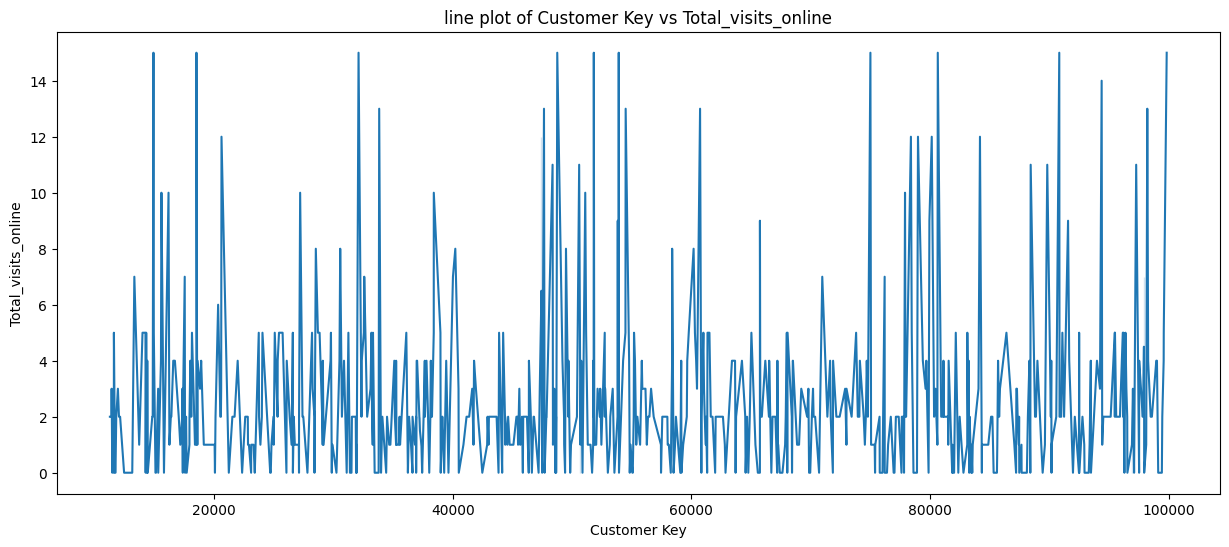

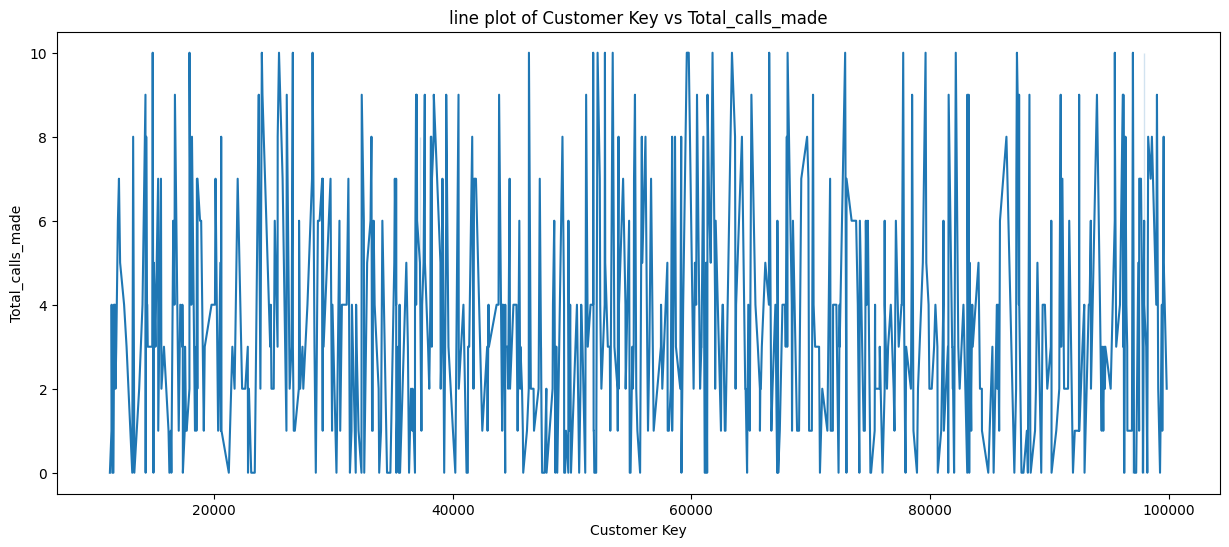

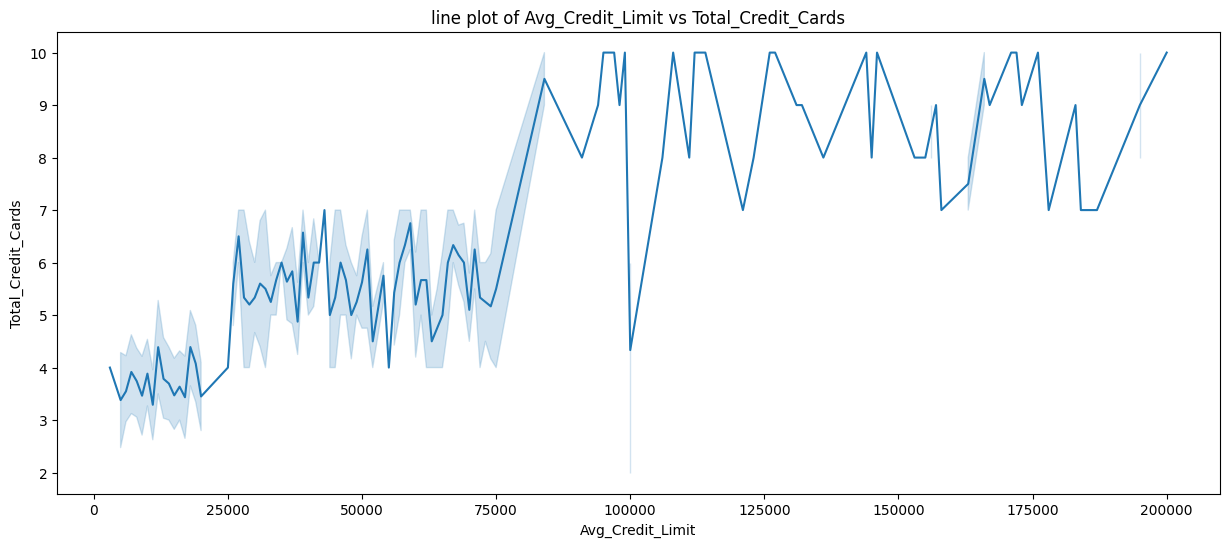

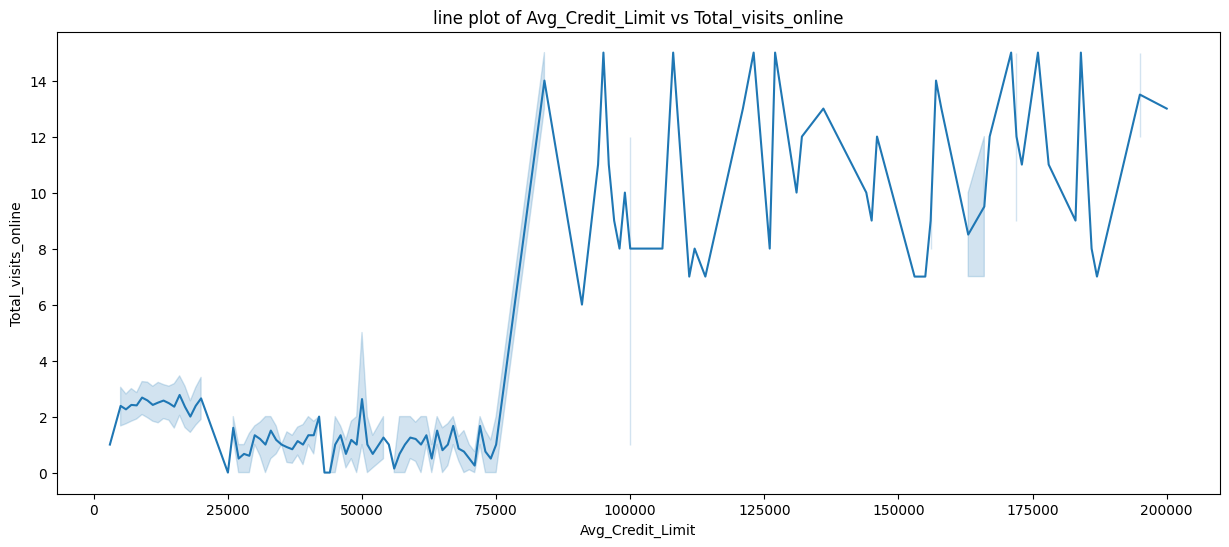

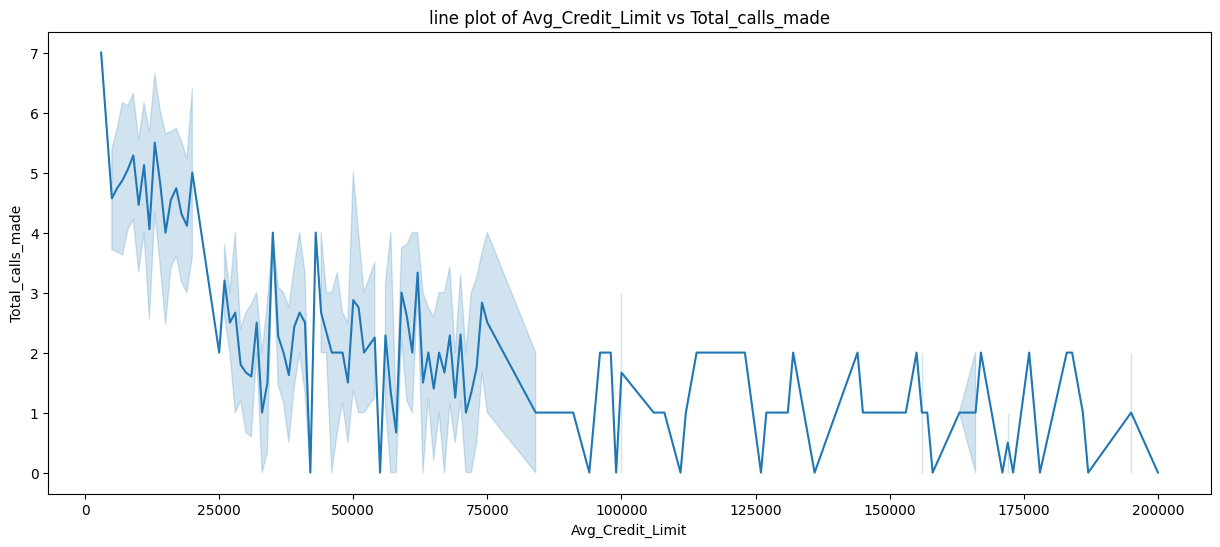

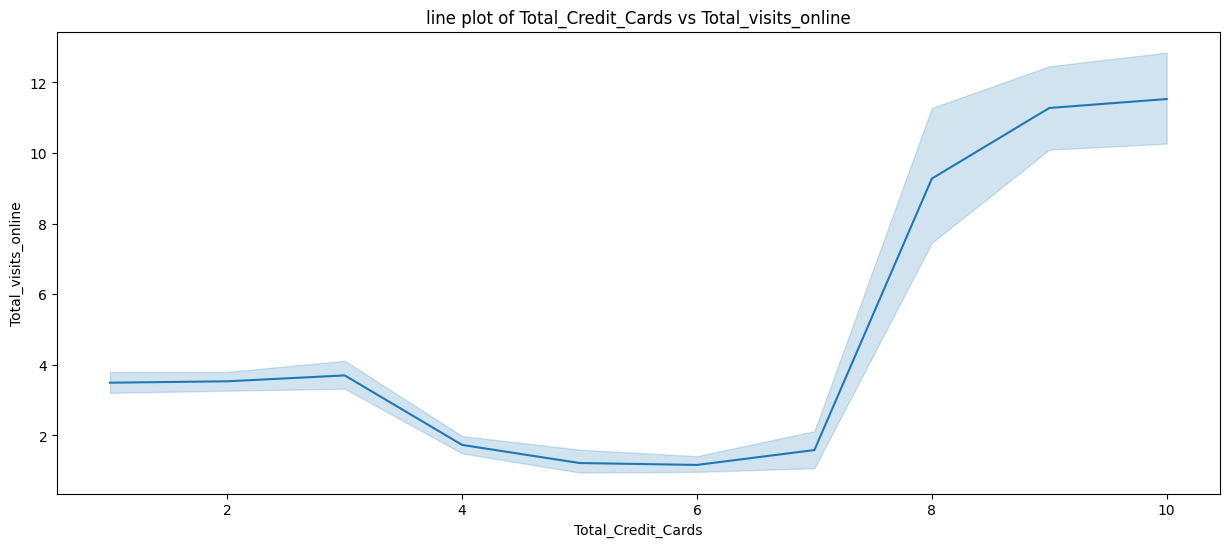

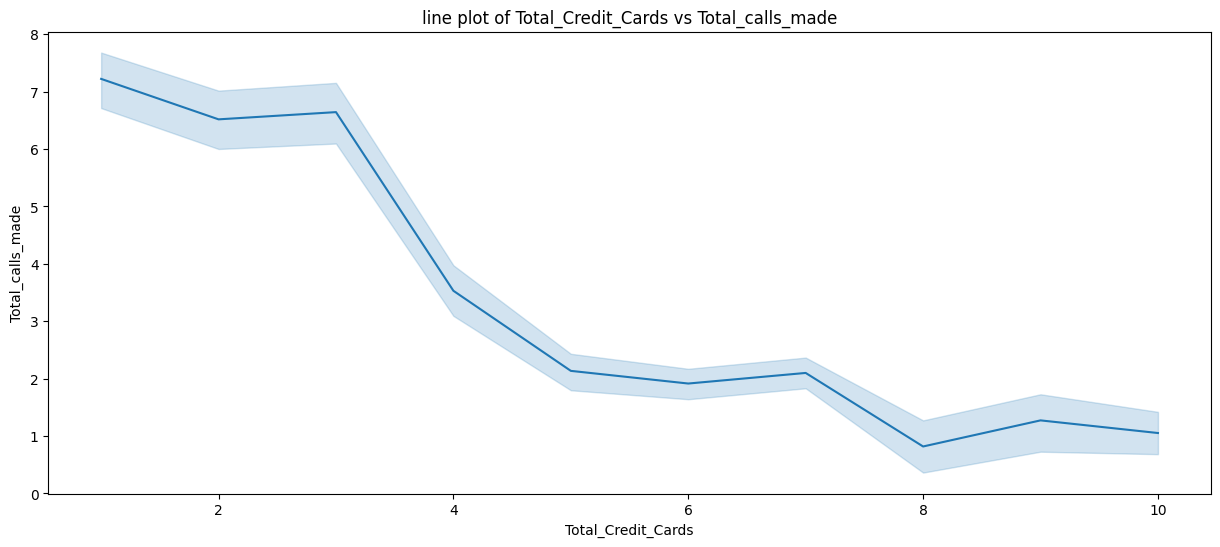

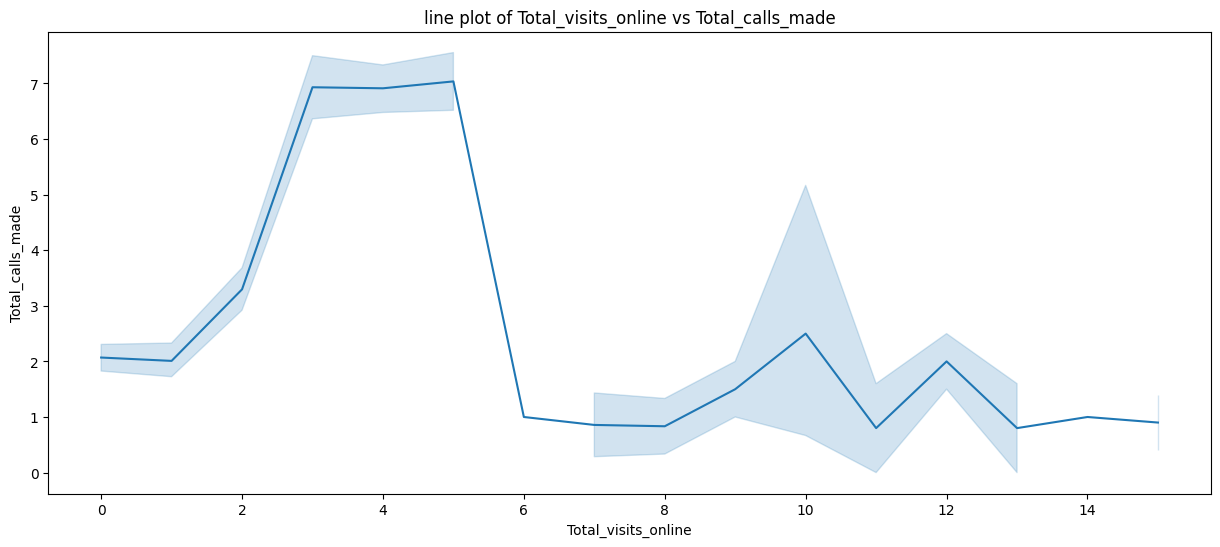

In [30]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.lineplot(x=continuous[i], y=continuous[j], data=df, palette='hls')
        plt.title(f'line plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

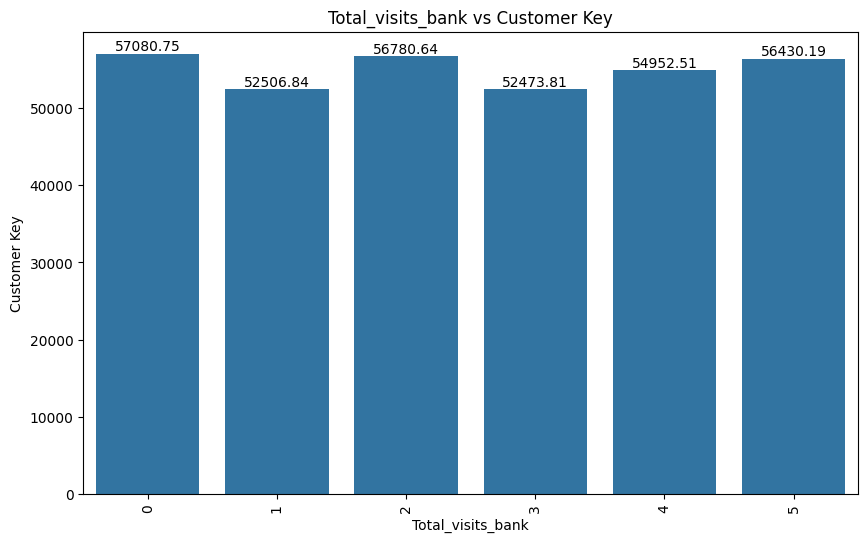

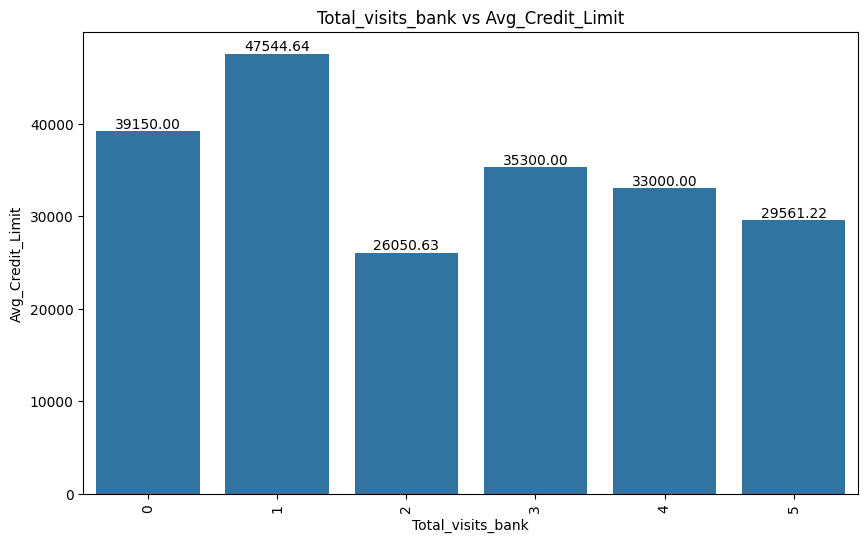

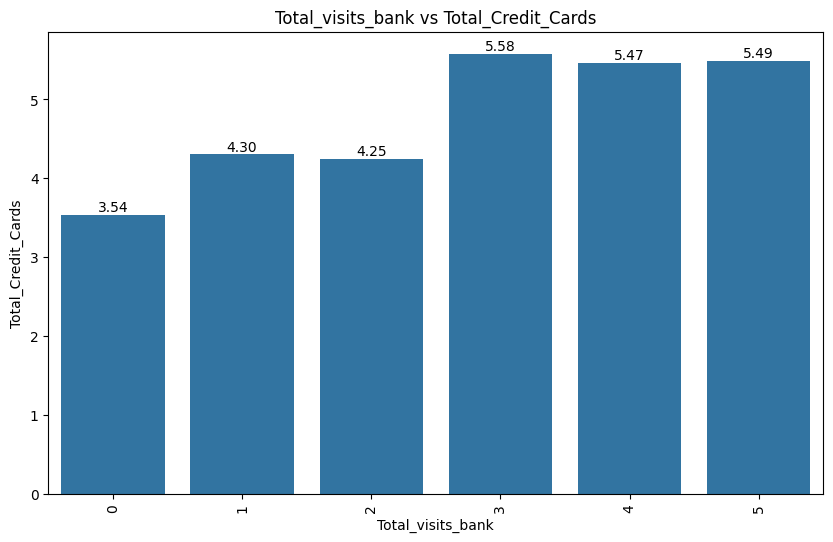

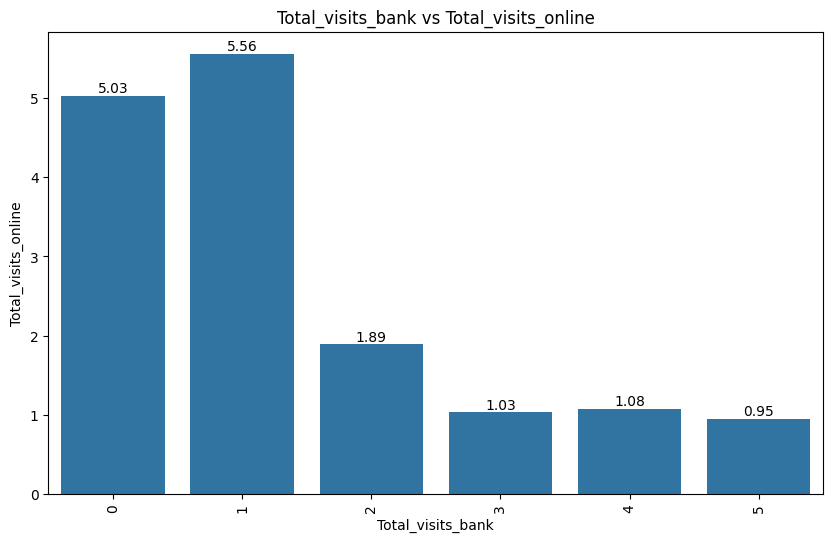

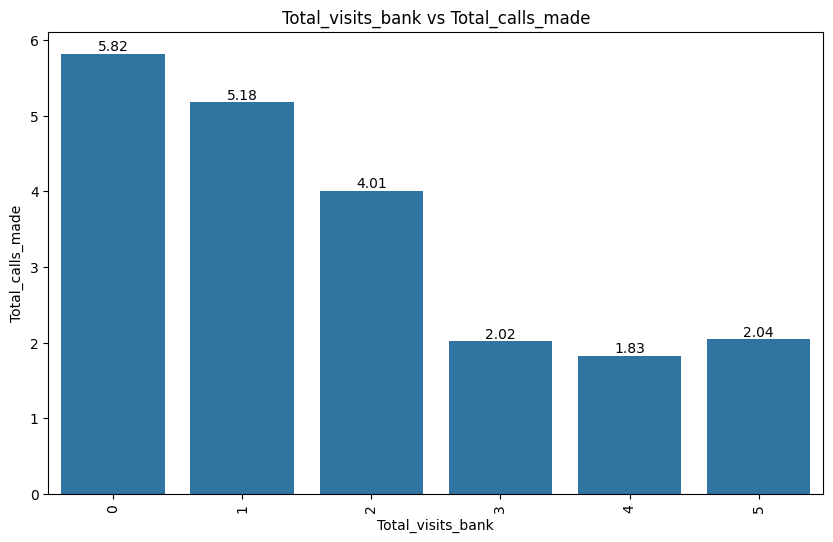

In [31]:
for dis in discrete:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=dis, y=cont, ci=None)
        plt.title(f'{dis} vs {cont}')

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()

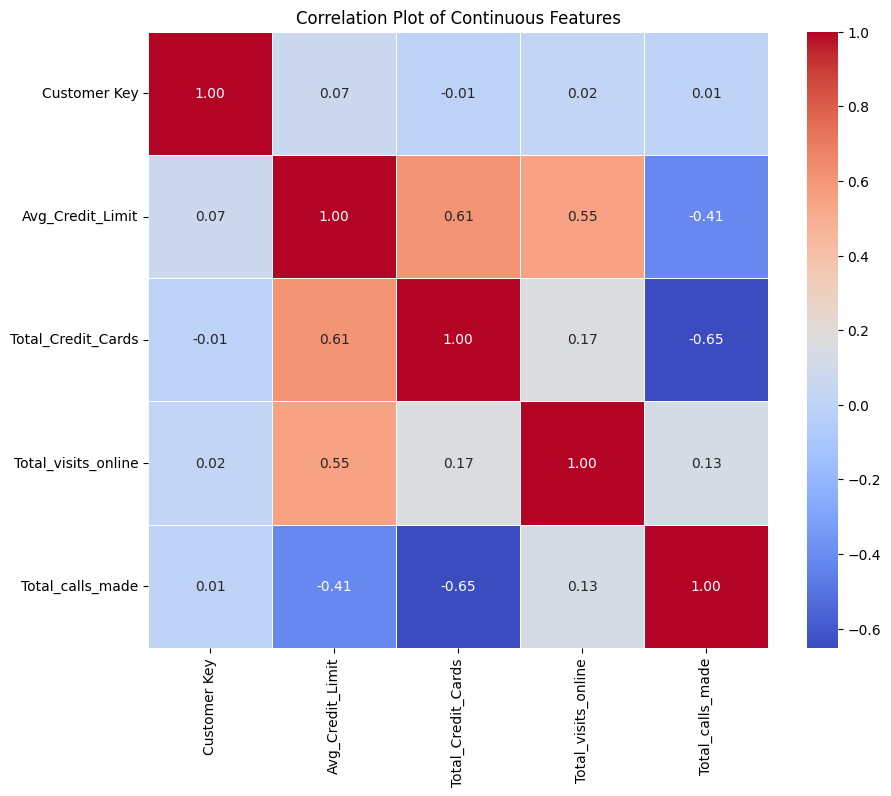

In [32]:
corr_matrix = df[continuous].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()

In [33]:
corr_matrix

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
Customer Key             1.000000          0.068604           -0.010281   
Avg_Credit_Limit         0.068604          1.000000            0.608860   
Total_Credit_Cards      -0.010281          0.608860            1.000000   
Total_visits_online      0.022506          0.551385            0.167758   
Total_calls_made         0.005968         -0.414352           -0.651251   

                     Total_visits_online  Total_calls_made  
Customer Key                    0.022506          0.005968  
Avg_Credit_Limit                0.551385         -0.414352  
Total_Credit_Cards              0.167758         -0.651251  
Total_visits_online             1.000000          0.127299  
Total_calls_made                0.127299          1.000000

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split

In [19]:
scalar=StandardScaler()

In [20]:
scaled_df=scalar.fit_transform(df)

In [21]:
df.columns

Index(['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [23]:
df2 = pd.DataFrame(scaled_df, columns=['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'])

In [24]:
df2

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0        1.246920          1.740187           -1.249225          -0.860451   
1       -0.653203          0.410293           -0.787585          -1.473731   
2       -1.476098          0.410293            1.058973          -0.860451   
3       -0.571901         -0.121665            0.135694          -0.860451   
4       -0.300857          1.740187            0.597334          -1.473731   
..            ...               ...                 ...                ...   
655     -0.157505          1.713589            2.443892          -0.860451   
656      0.218310          1.314621            2.443892          -0.860451   
657     -0.051055          2.937092            1.520613          -0.860451   
658      0.996298          3.655235            2.443892          -0.860451   
659      0.976578          3.522245            1.982253          -1.473731   

     Total_visits_online  Total_calls_made  
0              -0.547490         -1.251537  
1               2.520519          1.891859  
2               0.134290          0.145528  
3              -0.547490          0.145528  
4               3.202298         -0.203739  
..                   ...               ...  
655             2.520519         -1.251537  
656             3.543188         -0.553005  
657             2.179629         -0.902271  
658             4.224968         -1.251537  
659             3.202298         -0.553005  

[660 rows x 6 columns]

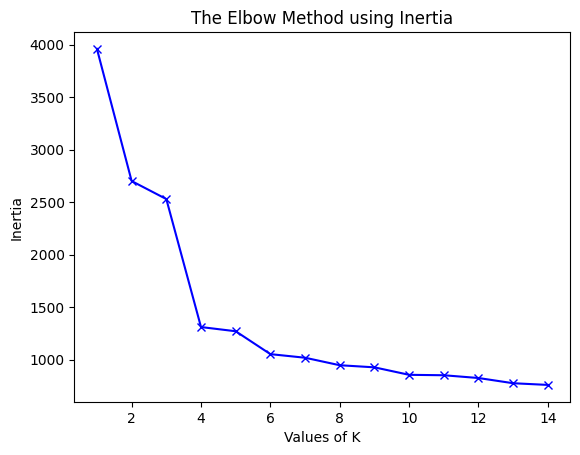

In [25]:
inertia = []

range_val = range(1, 15)

for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)

plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [26]:
df3 = df2.copy()

In [27]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(3)
kmeans_model.fit_predict(df3)
df_kmeans = pd.concat([df3, pd.DataFrame({'cluster': kmeans_model.labels_})], axis=1)

In [28]:
df_kmeans

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0        1.246920          1.740187           -1.249225          -0.860451   
1       -0.653203          0.410293           -0.787585          -1.473731   
2       -1.476098          0.410293            1.058973          -0.860451   
3       -0.571901         -0.121665            0.135694          -0.860451   
4       -0.300857          1.740187            0.597334          -1.473731   
..            ...               ...                 ...                ...   
655     -0.157505          1.713589            2.443892          -0.860451   
656      0.218310          1.314621            2.443892          -0.860451   
657     -0.051055          2.937092            1.520613          -0.860451   
658      0.996298          3.655235            2.443892          -0.860451   
659      0.976578          3.522245            1.982253          -1.473731   

     Total_visits_online  Total_calls_made  cluster  
0              -0.547490         -1.251537        0  
1               2.520519          1.891859        1  
2               0.134290          0.145528        0  
3              -0.547490          0.145528        0  
4               3.202298         -0.203739        2  
..                   ...               ...      ...  
655             2.520519         -1.251537        2  
656             3.543188         -0.553005        2  
657             2.179629         -0.902271        2  
658             4.224968         -1.251537        2  
659             3.202298         -0.553005        2  

[660 rows x 7 columns]

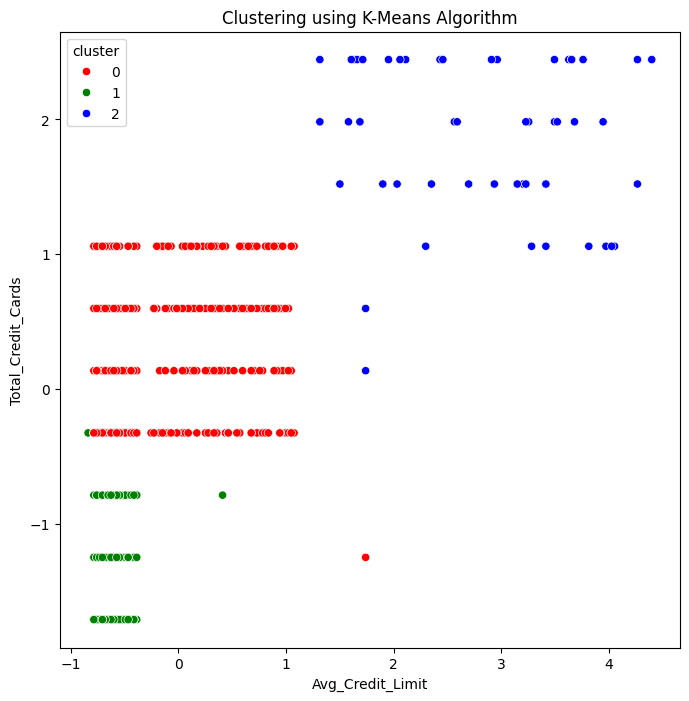

In [29]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="Avg_Credit_Limit",y="Total_Credit_Cards",hue="cluster",data=df_kmeans,palette=['red','green','blue'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [30]:
from sklearn.metrics import silhouette_score
sill_coeff = silhouette_score(df_kmeans.drop('cluster', axis = 1), df_kmeans["cluster"])
print("Sillehouette Coefficient :", round(sill_coeff, 3))

Sillehouette Coefficient : 0.418


In [31]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(df2)

In [32]:
pca_df_agg=pd.concat([df3,pd.DataFrame({'cluster':cluster.labels_})], axis=1)

In [33]:
pca_df_agg

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0        1.246920          1.740187           -1.249225          -0.860451   
1       -0.653203          0.410293           -0.787585          -1.473731   
2       -1.476098          0.410293            1.058973          -0.860451   
3       -0.571901         -0.121665            0.135694          -0.860451   
4       -0.300857          1.740187            0.597334          -1.473731   
..            ...               ...                 ...                ...   
655     -0.157505          1.713589            2.443892          -0.860451   
656      0.218310          1.314621            2.443892          -0.860451   
657     -0.051055          2.937092            1.520613          -0.860451   
658      0.996298          3.655235            2.443892          -0.860451   
659      0.976578          3.522245            1.982253          -1.473731   

     Total_visits_online  Total_calls_made  cluster  
0              -0.547490         -1.251537        0  
1               2.520519          1.891859        1  
2               0.134290          0.145528        0  
3              -0.547490          0.145528        0  
4               3.202298         -0.203739        0  
..                   ...               ...      ...  
655             2.520519         -1.251537        0  
656             3.543188         -0.553005        0  
657             2.179629         -0.902271        0  
658             4.224968         -1.251537        0  
659             3.202298         -0.553005        0  

[660 rows x 7 columns]

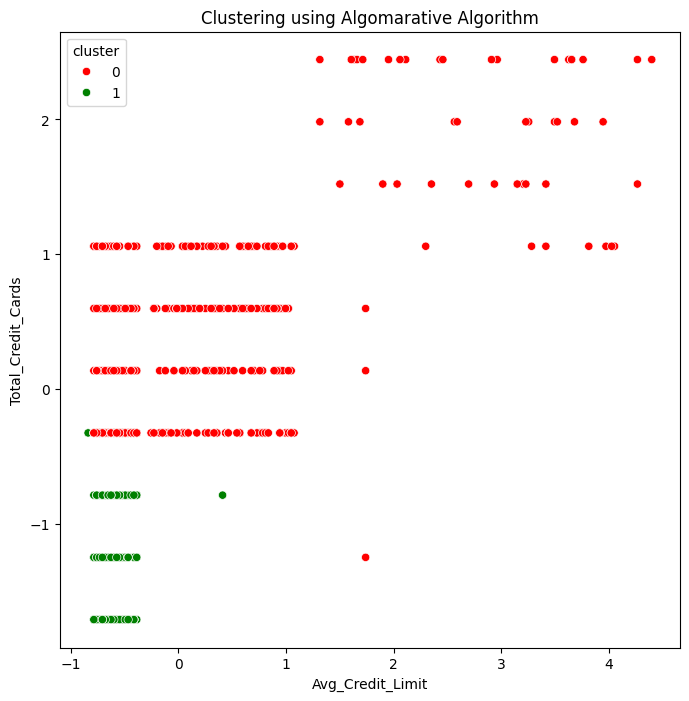

In [34]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x="Avg_Credit_Limit", y="Total_Credit_Cards", hue="cluster", data=pca_df_agg, palette=['red', 'green',])
plt.title("Clustering using Algomarative Algorithm")
plt.show()

In [35]:
sill_coeff = silhouette_score(pca_df_agg.drop('cluster', axis = 1), pca_df_agg["cluster"])
print("Sillehouette Coefficient :", round(sill_coeff, 3))

Sillehouette Coefficient : 0.338


In [36]:
from sklearn.cluster import DBSCAN

In [37]:
dbscan=DBSCAN(eps=0.2, min_samples=5)
clusters=dbscan.fit_predict(df2)

In [38]:
pca_df_agg=pd.concat([df2,pd.DataFrame({'cluster':cluster.labels_})], axis=1)

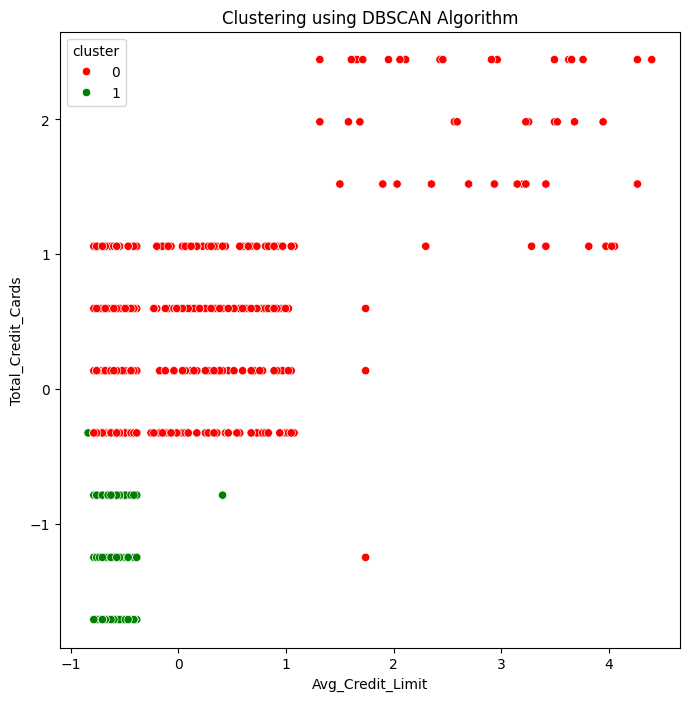

In [39]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x="Avg_Credit_Limit", y="Total_Credit_Cards", hue="cluster", data=pca_df_agg, palette=['red', 'green',])
plt.title("Clustering using DBSCAN Algorithm")
plt.show()